In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

#round float to 2 decimal places and display max columns
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows',None)

#for better plot resolution
%config InlineBackend.figure_format = 'retina'

#transforms the output on the transform method in a pandas datafram
sklearn.set_config(transform_output="pandas")

#ignores warnings
warnings.filterwarnings("ignore")

#installing category encoders
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.5 MB/s eta 0:00:00


In [2]:
!pip install --upgrade scikit-learn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
df = pd.read_csv("/content/drive/MyDrive/adverts.csv")

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689      0.00      NaN            Grey         Volvo   
1   202007020778260 108230.00       61            Blue        Jaguar   
2   202007020778474   7800.00       17            Grey         SKODA   
3   202007080986776  45000.00       16           Brown      Vauxhall   
4   202007161321269  64000.00       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED               2011.00   7000   
2               Yeti              USED               2017.00  14000   
3              Mokka              USED               2016.00   7995   
4  Range Rover Sport              USED               2015.00  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [7]:
df.describe()

public_reference   mileage  year_of_registration      price
count          402005.00 401878.00             368694.00  402005.00
mean  202007077472444.47  37743.60               2015.01   17341.97
std       16916615997.34  34831.72                  7.96   46437.46
min   201307177852187.00      0.00                999.00     120.00
25%   202009023197699.00  10481.00               2013.00    7495.00
50%   202009304400624.00  28629.50               2016.00   12600.00
75%   202010175124399.00  56875.75               2018.00   20000.00
max   202011025683478.00 999999.00               2020.00 9999999.00

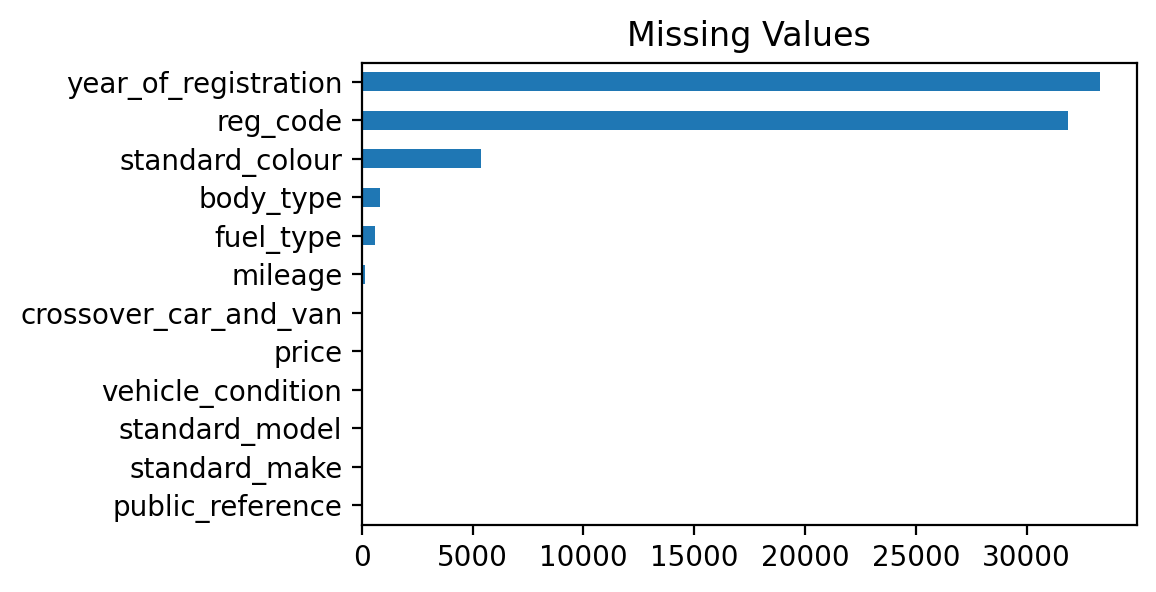

In [149]:
#Missing values
plt.figure(figsize =(5,3))
df.isna().sum().sort_values(ascending = True).plot(kind = "barh")
plt.title("Missing Values")
plt.show()

# DATA CLEANING

In [7]:
df.isna().sum().sort_values(ascending = False)

year_of_registration     33311
reg_code                 31857
standard_colour           5378
body_type                  837
fuel_type                  601
mileage                    127
public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
dtype: int64

## YEAR OF REGISTRATION CLEANING

In [8]:
regcodeid = {'51': 2001, '52': 2002, '53': 2003, '54':2004, '55': 2005, '56': 2006, '57': 2007, '58': 2008, '59': 2009, '60':2010,'61': 2011, '62': 2012, '63': 2013, '64': 2014,
             '65': 2015, '66': 2016, '67': 2017, '68': 2018, '69': 2019, '70':2020, '01': 2001, '02': 2002, '03': 2003, '04':2004, '05': 2005, '06': 2006, '07': 2007, '08': 2008,
             '09': 2009, '10':2010,'11': 2011, '12': 2012, '13': 2013, '14': 2014,'15': 2015, '16': 2016, '17': 2017, '18': 2018, '19': 2019, '20':2020,'A': 1963,'B':1964,'E': 1967,
             'H': 1969, 'K': 1971, 'L': 1972, 'M':1973, 'V':1979, 'G': 1968, 'T': 1978, 'N': 1974,'P': 1975, 'F':1967, 'R': 1976, 'C': 1965, 'Y': 1982,'J': 1970, 'S': 1977, 'X': 1981,
             'D': 1966, 'W': 1980,'m':1994,'s':1998,'k':1992,'p':1996
             }

In [9]:
df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [10]:
#get rid of reg_code that has 3 characters or more
df = df.loc[(df['reg_code'].str.len() < 3) | (df['reg_code'].isnull())]

In [11]:
df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '95', 's', '38', 'k',
       '37', 'p'], dtype=object)

In [12]:
df.loc[df['vehicle_condition'] == 'NEW'].shape

(31249, 12)

In [13]:
#extract year car was published from the public reference column
df['publish_year'] = pd.to_datetime(df['public_reference'].astype(str).str[:8]).dt.strftime("%Y")

In [14]:
df['publish_year'] =  df['publish_year'].astype(float)

In [15]:
#for new cars the year of registration was filled with the publish year
df.loc[df["vehicle_condition"] == 'NEW',"year_of_registration"] = df.loc[df['vehicle_condition'] == "NEW","publish_year"]

In [16]:
df['year_of_registration'].unique()

array([2020., 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003.,   nan, 2006., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

In [17]:
df['year_of_registration'] = df['year_of_registration'].astype(float)

In [18]:
df.loc[df['year_of_registration'] < 1800]['year_of_registration'].unique()

array([1007., 1515., 1063., 1009., 1016., 1010., 1008., 1018.,  999.,
       1017., 1006., 1015.])

In [19]:
year_err = {
    1007 : 2007, 1515 : 2015, 1063: 1963, 1009: 2009, 1010: 2010, 1008: 2008, 1018: 2018, 999: 1999, 1017: 2017, 1006: 2006, 1015: 2015,1016:2016
}

In [20]:
year_err_fixed = df.loc[df['year_of_registration'] < 1800]['year_of_registration'].map(year_err)

In [21]:
df.loc[df['year_of_registration'] < 1800]['year_of_registration']

59010    1007.00
69516    1515.00
84501    1063.00
114737   1009.00
120858   1016.00
190556   1010.00
199830   1009.00
199987   1008.00
201616   1018.00
201626    999.00
201773   1007.00
213059    999.00
274622   1017.00
334679    999.00
339167   1007.00
374798   1006.00
387633   1015.00
Name: year_of_registration, dtype: float64

In [22]:
df.loc[df['year_of_registration'] < 1800,['year_of_registration']] = year_err_fixed

The correct registration codes where scrapped from the [Vehicle registration plates of the United Kingdom page on Wikipedia](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom)

In [23]:
#mapping reg_code to regcodeid dictionary
years = df.loc[df['year_of_registration'].isnull() & df['reg_code'].notnull()]['reg_code'].map(regcodeid)

In [24]:
## filling null values where reg_code is available and year_of_registration is null
df.loc[df['year_of_registration'].isnull() & df['reg_code'].notnull(), 'year_of_registration'] = years

In [25]:
## futuristic values
df.drop(df.loc[df['year_of_registration'].isnull() & df['reg_code'].notnull()].index, inplace = True)

In [26]:
#dropping all used car that have mileage of zero, this is misleading and could affect model generalisibility
df.drop(df.loc[(df['mileage'] == 0) & (df['vehicle_condition'] == 'USED')].index, inplace = True)

In [27]:
df.drop("reg_code", axis = 1, inplace = True)

In [28]:
df.loc[df['year_of_registration'].isnull()].head()

public_reference  mileage standard_colour standard_make  \
1510   202010054642656 13406.00           White    Land Rover   
2631   202010235350805  1000.00            Blue      Maserati   
4766   202003238706011      NaN            Grey        Subaru   
6998   202010225284269   160.00            Grey       McLaren   
7517   202009234093511 11413.00             NaN          MINI   

          standard_model vehicle_condition  year_of_registration   price  \
1510  Range Rover Evoque              USED                   NaN   26000   
2631             Levante              USED                   NaN   63995   
4766             Outback              USED                   NaN   35995   
6998               Senna              USED                   NaN  699950   
7517         Convertible              USED                   NaN   14400   

        body_type  crossover_car_and_van fuel_type  publish_year  
1510        Coupe                  False    Diesel       2020.00  
2631          SUV                  False    Petrol       2020.00  
4766       Estate                  False    Petrol       2020.00  
6998        Coupe                  False    Petrol       2020.00  
7517  Convertible                  False    Diesel       2020.00

In [29]:
df.isna().sum()

public_reference            0
mileage                   127
standard_colour          5366
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration      319
price                       0
body_type                 826
crossover_car_and_van       0
fuel_type                 594
publish_year                0
dtype: int64

In [30]:
#drop rows where year of registration is greater than publish_year
df.drop(df.loc[df['year_of_registration'] > df['publish_year']].index, inplace = True)

In [31]:
#Dropping the remaining 319 rows where year of registration is missing because, this will be a key feature and imputting those values might affect the model negatively
df.drop(df.loc[df['year_of_registration'].isnull()].index, inplace = True)

In [32]:
df.isna().sum()

public_reference            0
mileage                   115
standard_colour          5333
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                 766
crossover_car_and_van       0
fuel_type                 585
publish_year                0
dtype: int64

## CALCULATING AGE OF CAR

In [33]:
df['age'] = df['publish_year'] - df['year_of_registration']

##CLEANING CONTINUES

In [34]:
df['vehicle_condition'] = (df['vehicle_condition'] == 'NEW').astype(int)

In [35]:
df['vehicle_condition'].value_counts()

vehicle_condition
0    369762
1     31249
Name: count, dtype: int64

In [36]:
df['crossover_car_and_van'].value_counts()

crossover_car_and_van
False    399236
True       1775
Name: count, dtype: int64

This feature will be dropped due to the high level of imbalance observed in the value counts output above.

In [37]:
df.drop('crossover_car_and_van', axis = 1, inplace = True)

## OUTLIER DETECTION

In [38]:
df.describe()

public_reference   mileage  vehicle_condition  year_of_registration  \
count          401011.00 400896.00          401011.00             401011.00   
mean  202007168306908.22  37806.39               0.08               2015.43   
std       16566975151.92  34830.73               0.27                  4.42   
min   201307177852187.00      0.00               0.00               1909.00   
25%   202009023200444.50  10552.00               0.00               2014.00   
50%   202009304401270.00  28719.00               0.00               2017.00   
75%   202010175124771.00  57000.00               0.00               2018.00   
max   202011025683478.00 999999.00               1.00               2020.00   

           price  publish_year       age  
count  401011.00     401011.00 401011.00  
mean    17132.67       2019.98      4.55  
std     25202.70          0.16      4.41  
min       120.00       2013.00      0.00  
25%      7495.00       2020.00      2.00  
50%     12595.00       2020.00      3.00  
75%     19999.00       2020.00      6.00  
max   3799995.00       2020.00    111.00

<Axes: xlabel='price'>

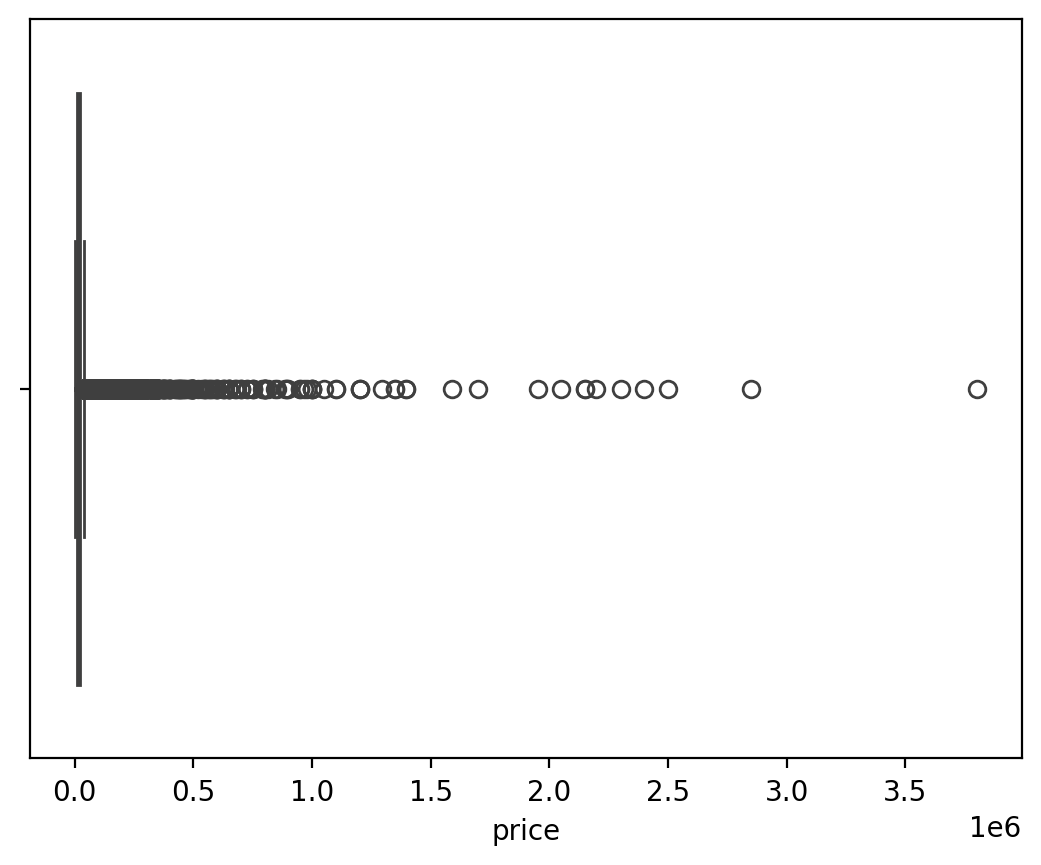

In [39]:
sns.boxplot(data = df, x = 'price')

<Axes: xlabel='mileage'>

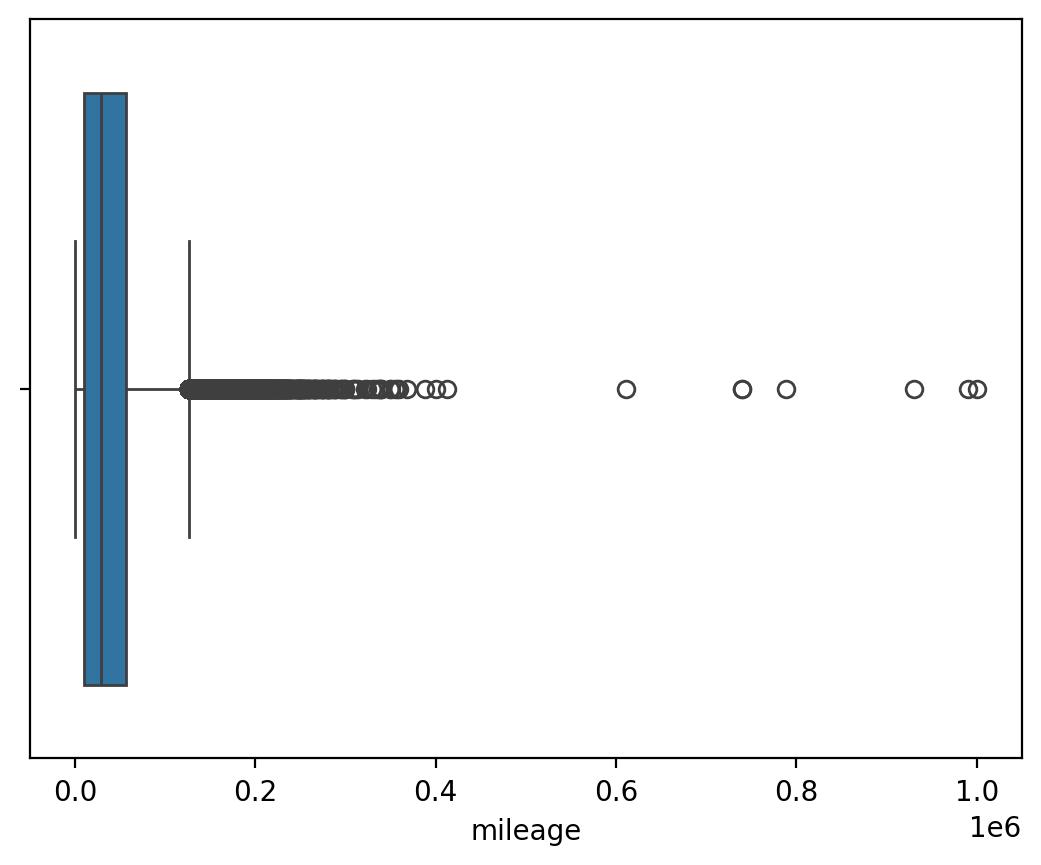

In [86]:
sns.boxplot(data = df, x= "mileage")

<Axes: xlabel='mileage', ylabel='Count'>

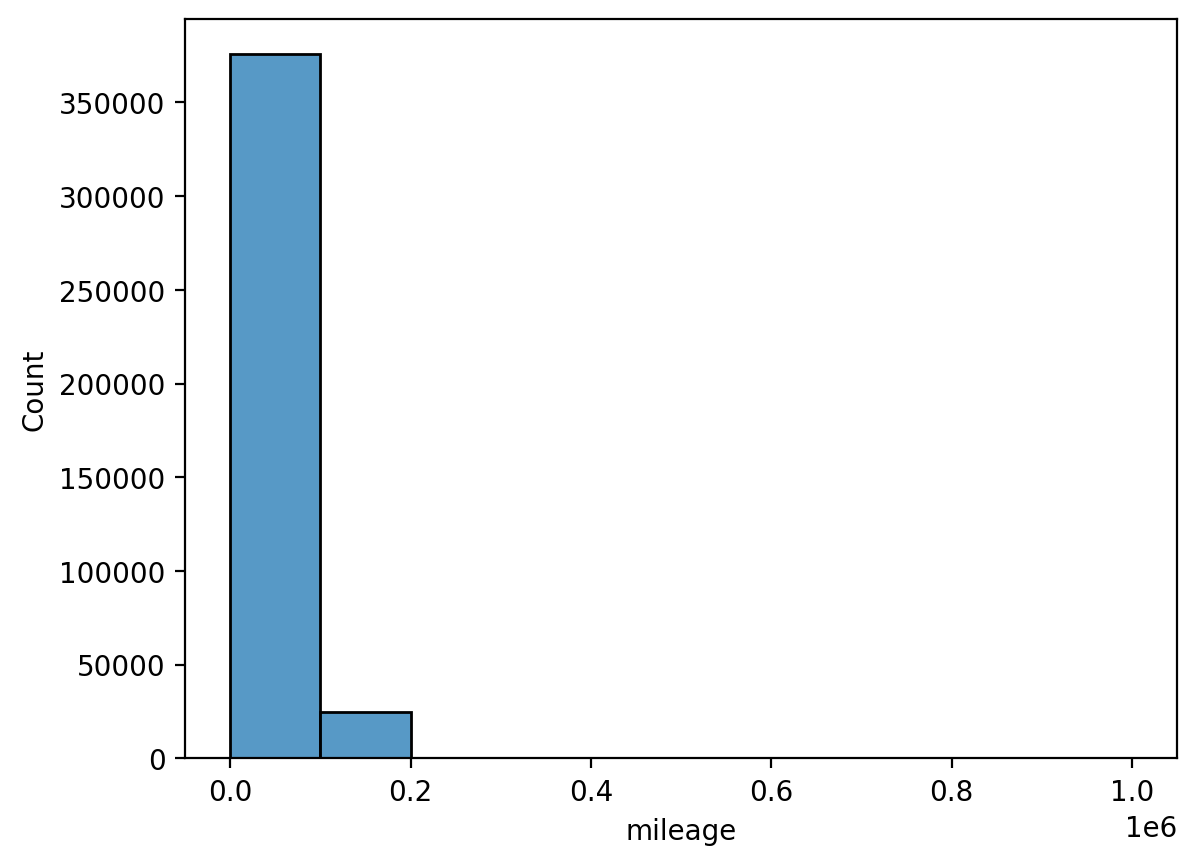

In [40]:
sns.histplot(data = df, x = 'mileage',bins= 10)

Mileage will be capped at 200k because most of the values above 200k are looking unrealistic and according to an article from [caranalytics.com](https://www.caranalytics.co.uk/guides/average-car-mileage/#:~:text=The%20typical%20annual%20miles%20of,70%2C000%20kilometers%20on%20the%20odometer.), The typical annual miles of a vehicle is between 10,000 and 15,000 miles which translates to 100k-150k miles per 10years. Capping it at 200k will enable the model to generalise to high values of mileage considering taxis and other heavy use vehicle might hit 150k to 200k miles per 10years

In [41]:
df.drop(df.loc[df['mileage'] > 200000].index, inplace = True)

<Axes: xlabel='mileage'>

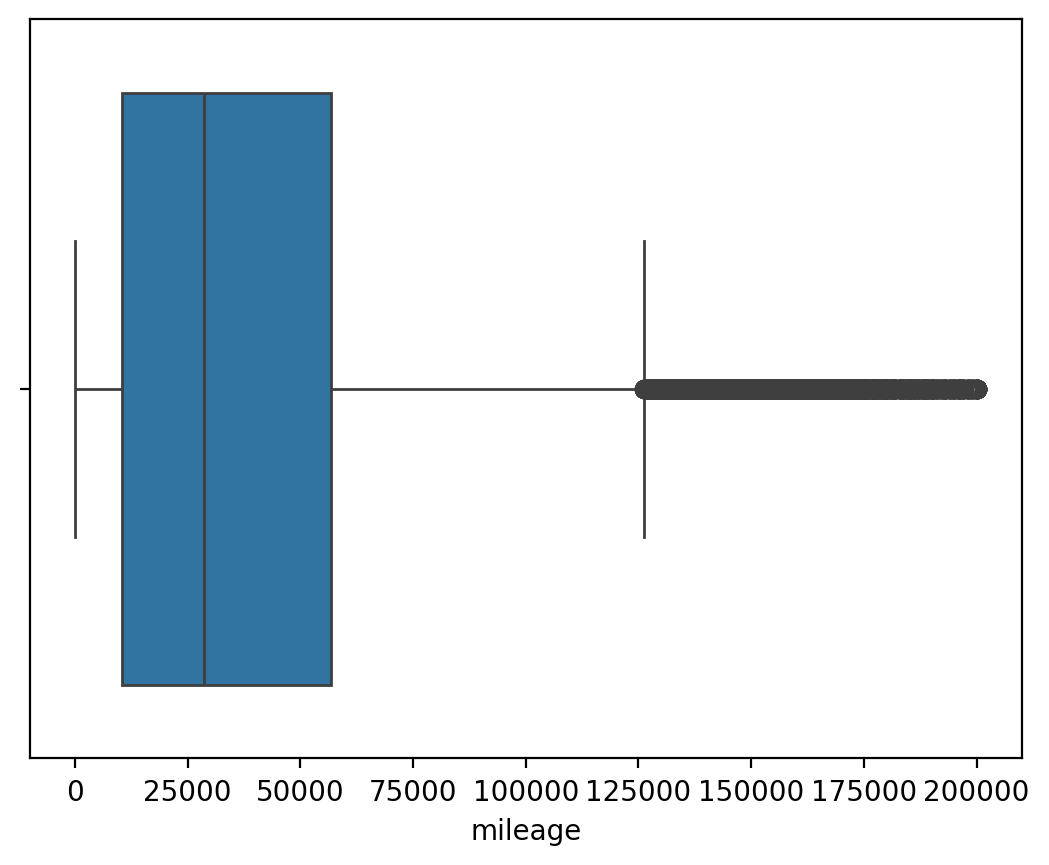

In [42]:
sns.boxplot(data = df, x = 'mileage')

<Axes: xlabel='age'>

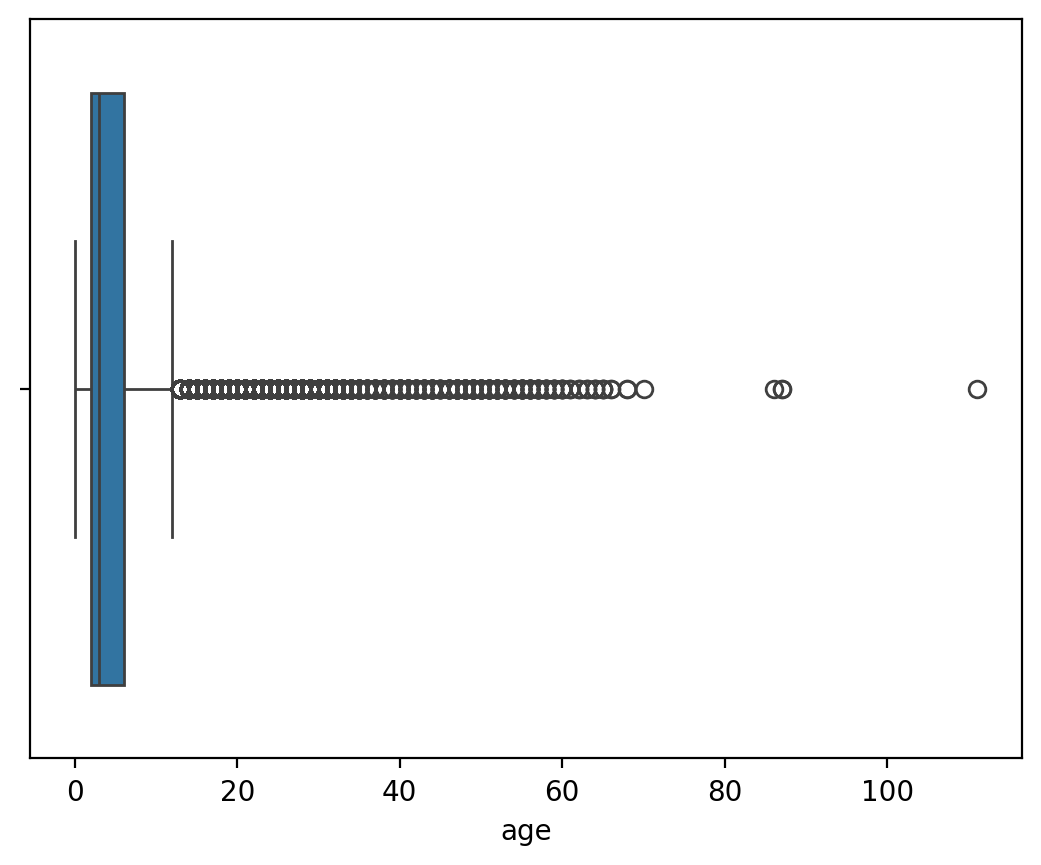

In [43]:
sns.boxplot(data = df, x ='age')

In [44]:
df.query('age > 70')

public_reference  mileage standard_colour standard_make  \
28925    202006140121316 26000.00           Black        Austin   
148003   202010104836987 31172.00           Black       Hyundai   
150850   202006220401450 12345.00           Black        Austin   
156562   202009264242828 48000.00           Black        Morris   

       standard_model  vehicle_condition  year_of_registration  price  \
28925           Seven                  0               1933.00   9995   
148003            i10                  0               1909.00   3950   
150850         Twelve                  0               1933.00  11990   
156562             10                  0               1934.00   5995   

        body_type fuel_type  publish_year    age  
28925      Saloon    Petrol       2020.00  87.00  
148003  Hatchback    Petrol       2020.00 111.00  
150850     Saloon    Petrol       2020.00  87.00  
156562     Saloon    Petrol       2020.00  86.00

In [45]:
## A Hyundai i10 with year of registration as 1909 is assumed to be an error and thus will be dropped
df.drop(148003, inplace = True)

In [46]:
df.query('age > 70')

public_reference  mileage standard_colour standard_make  \
28925    202006140121316 26000.00           Black        Austin   
150850   202006220401450 12345.00           Black        Austin   
156562   202009264242828 48000.00           Black        Morris   

       standard_model  vehicle_condition  year_of_registration  price  \
28925           Seven                  0               1933.00   9995   
150850         Twelve                  0               1933.00  11990   
156562             10                  0               1934.00   5995   

       body_type fuel_type  publish_year   age  
28925     Saloon    Petrol       2020.00 87.00  
150850    Saloon    Petrol       2020.00 87.00  
156562    Saloon    Petrol       2020.00 86.00

In [47]:
#drop publish_year
df.drop('publish_year', axis = 1,inplace = True)

# DATA SPLITTING

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop(['price','public_reference'],axis = 1)

In [50]:
y = df['price']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
train = pd.concat([X_train,y_train],axis = 1)

In [53]:
train.head()

mileage standard_colour  standard_make standard_model  \
205823  5875.00            Grey  Mercedes-Benz        C Class   
373054 96000.00           Beige       Vauxhall         Zafira   
389134 24000.00             Red           MINI          Hatch   
128732 30281.00           Black         Nissan        Qashqai   
267420 48000.00          Silver  Mercedes-Benz            SLK   

        vehicle_condition  year_of_registration    body_type fuel_type   age  \
205823                  0               2019.00       Estate    Diesel  1.00   
373054                  0               2006.00          MPV    Petrol 14.00   
389134                  0               2017.00    Hatchback    Petrol  3.00   
128732                  0               2018.00          SUV    Diesel  2.00   
267420                  0               2012.00  Convertible    Diesel  8.00   

        price  
205823  27980  
373054   1790  
389134   9479  
128732  15250  
267420  10995

# DISTRIBUTION ANALYSIS OF FEATURES


In [54]:
cat_feat = train.drop(columns = train.select_dtypes('number')).columns
num_feat = train.drop(columns = train.select_dtypes('object')).columns

In [55]:
cat_feat

Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object')

In [56]:
num_feat

Index(['mileage', 'vehicle_condition', 'year_of_registration', 'age', 'price'], dtype='object')

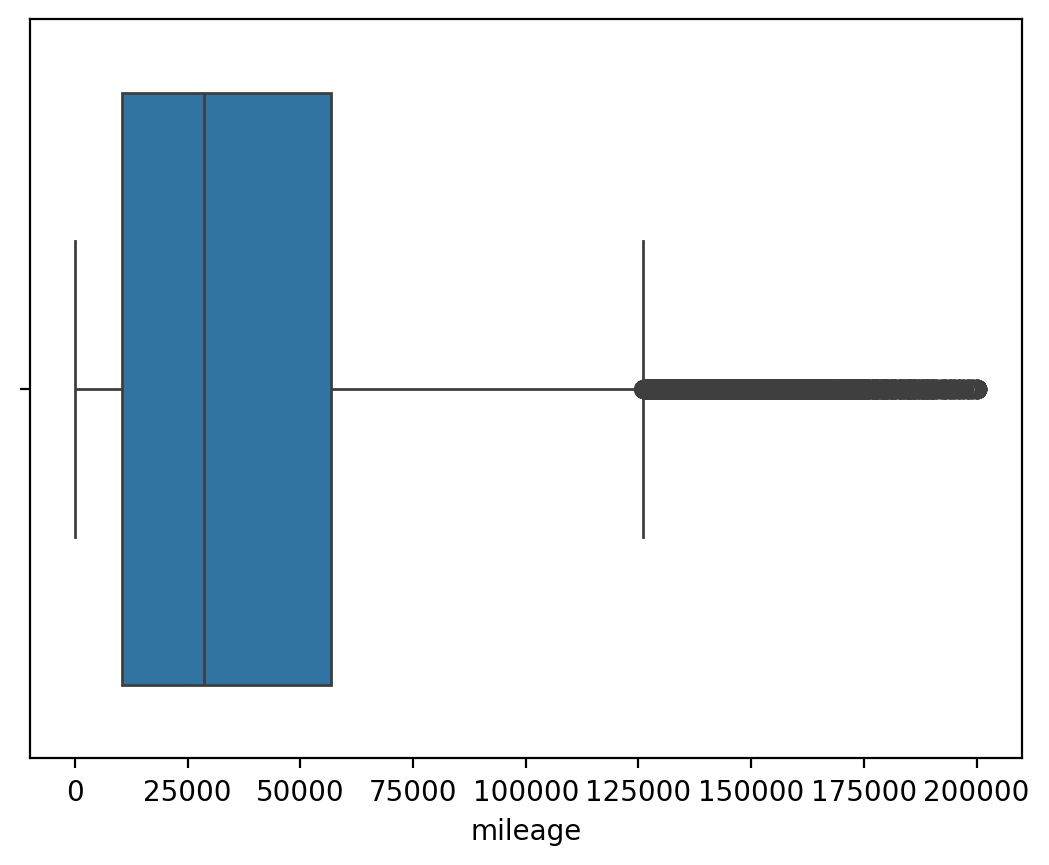

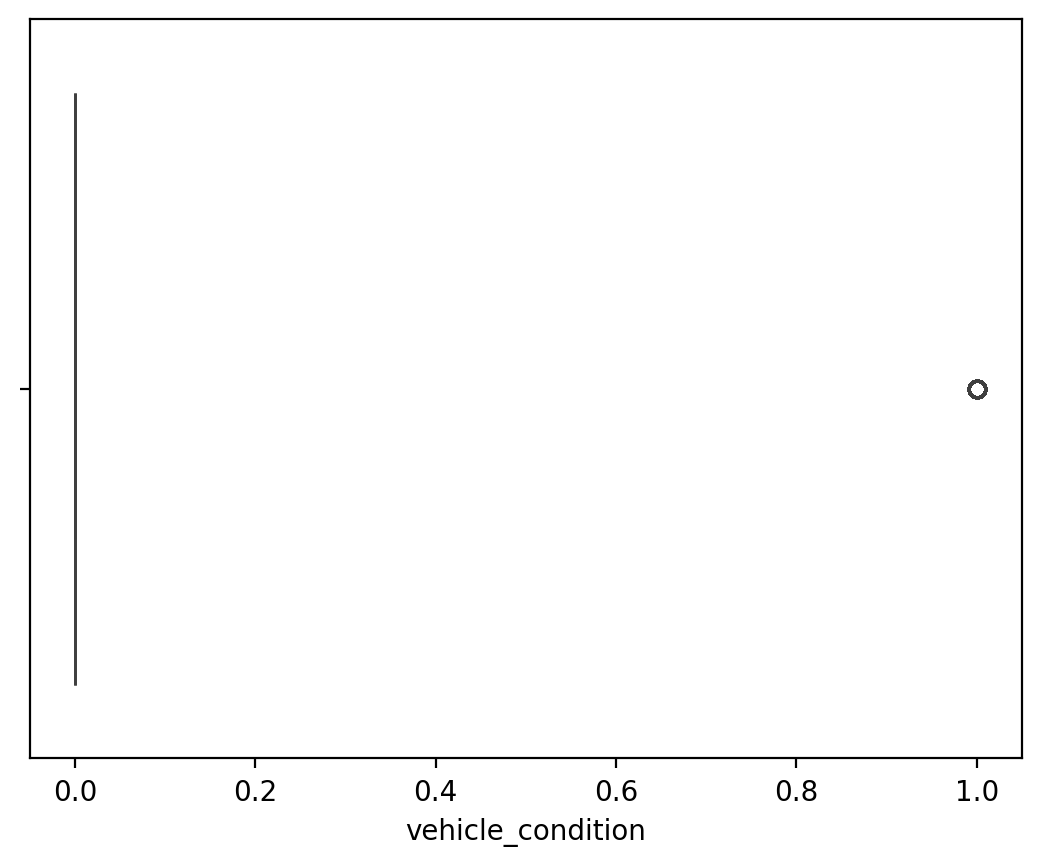

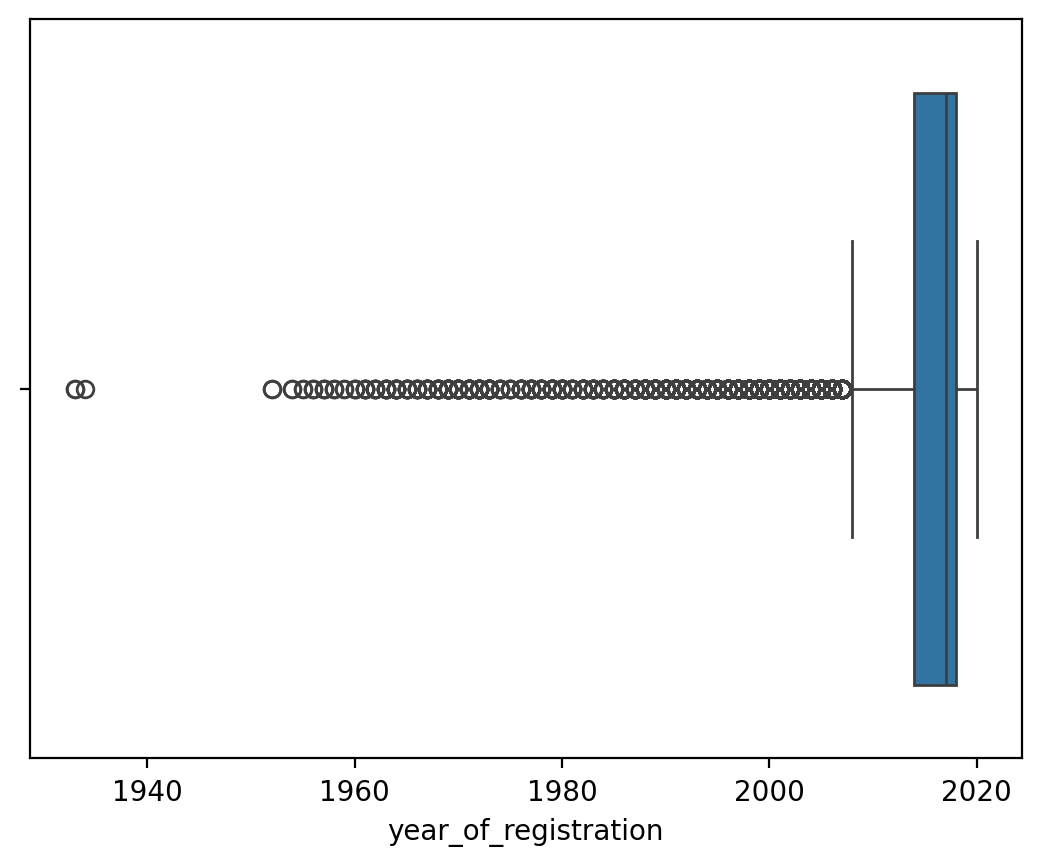

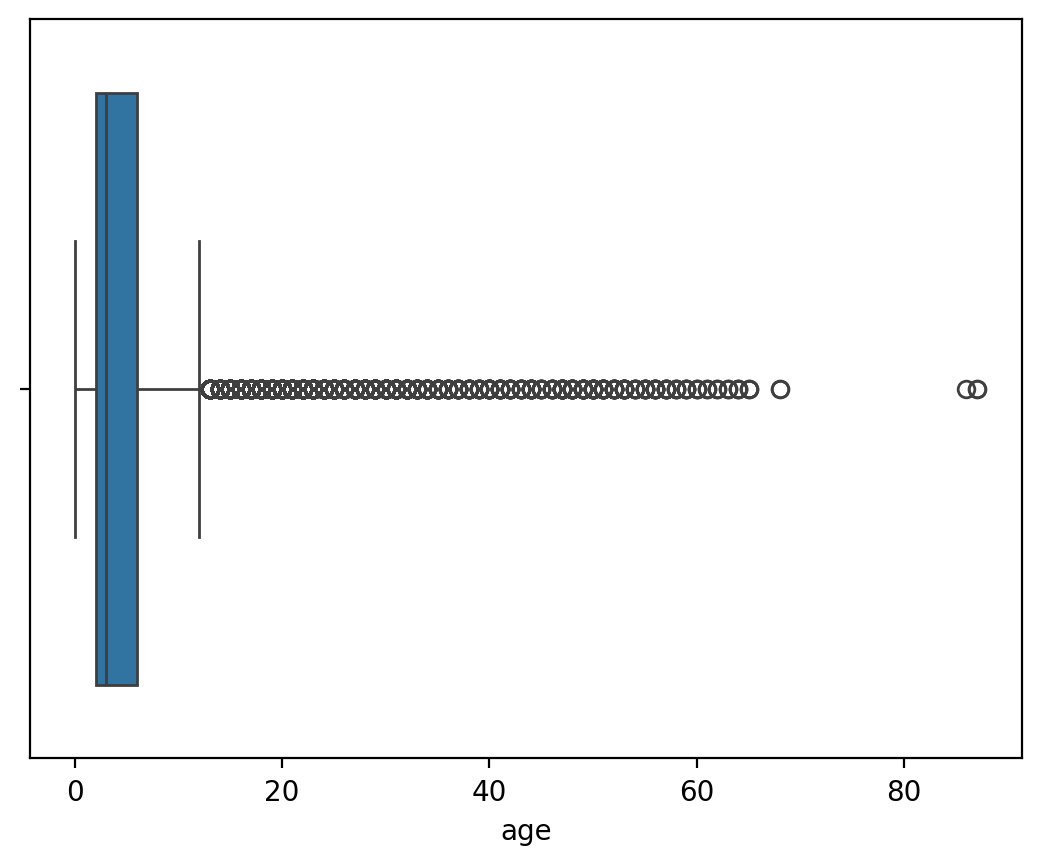

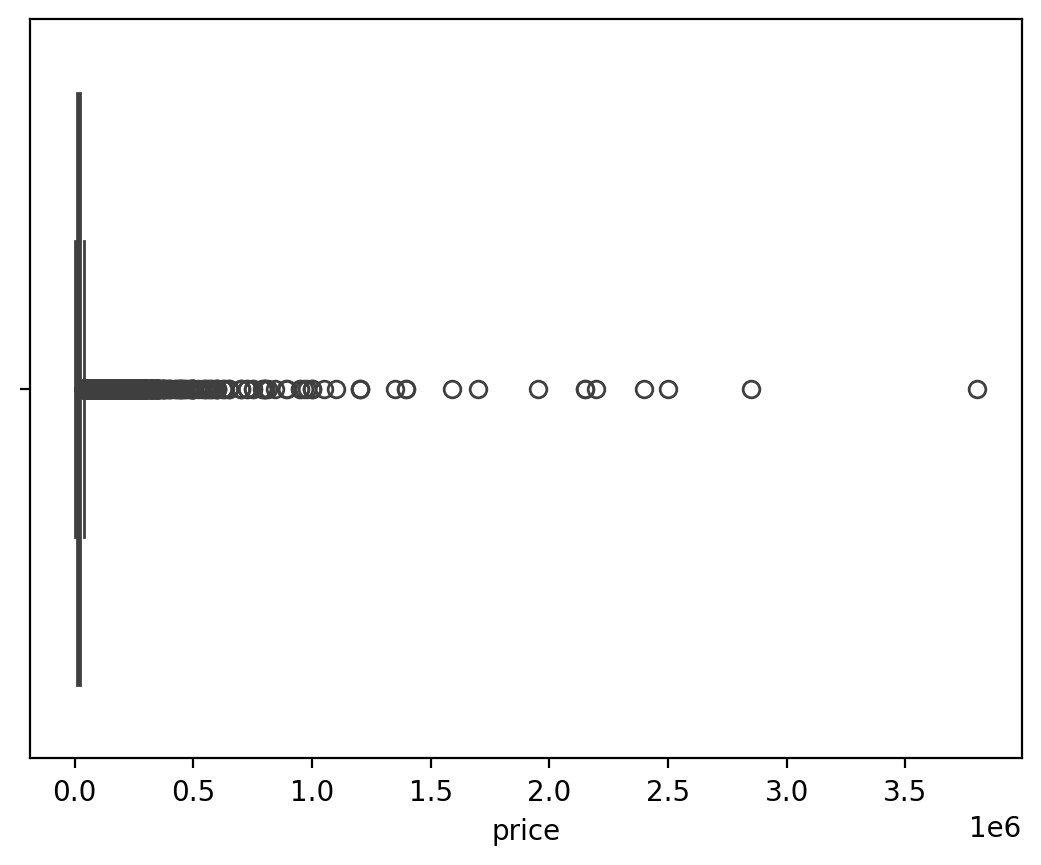

In [57]:
for feature in num_feat:
  sns.boxplot(data = train, x = feature)
  plt.show()

In [58]:
#amount of unique values for each categorical feature
for col in cat_feat:
  print( f"{col} : {len(train[col].unique())}")

standard_colour : 23
standard_make : 102
standard_model : 1113
body_type : 16
fuel_type : 10


<Axes: xlabel='count', ylabel='standard_colour'>

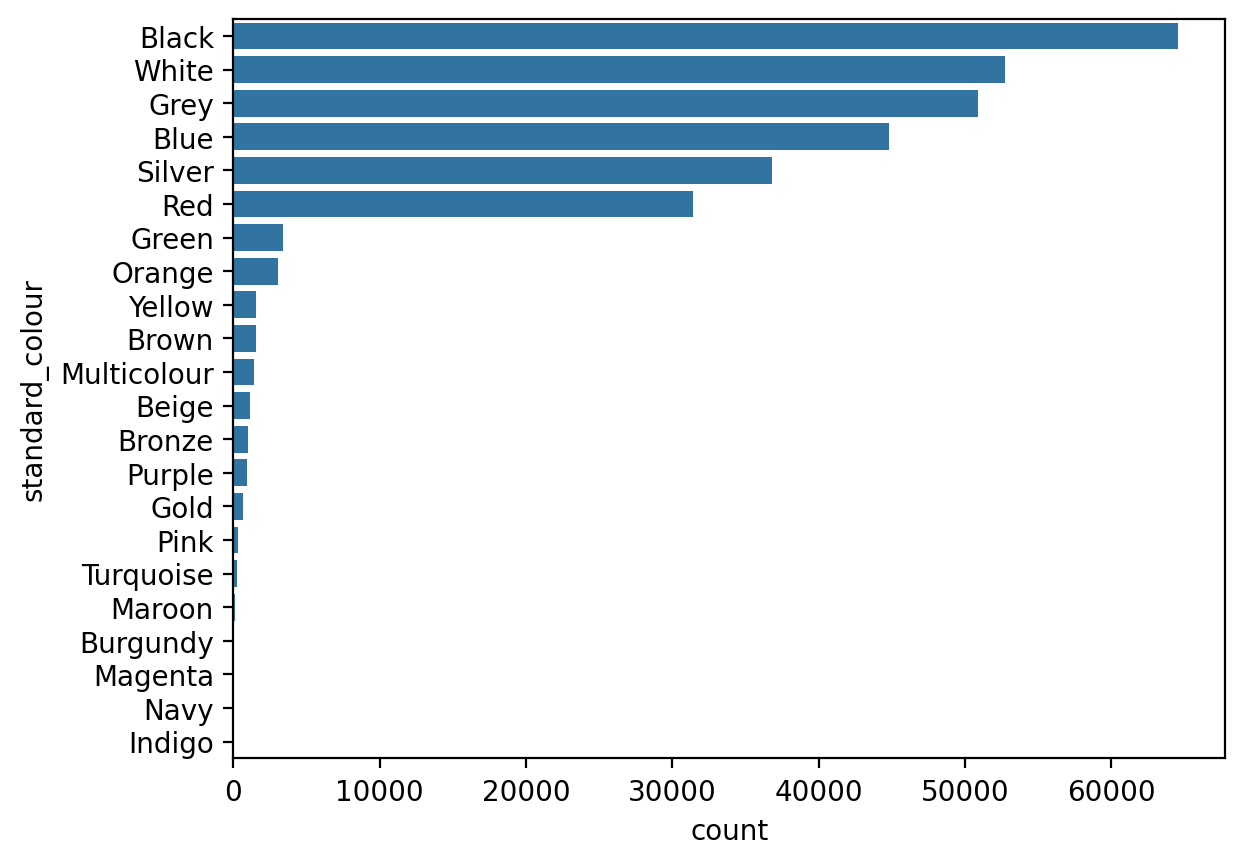

In [59]:
sns.countplot(data = train, y = "standard_colour", order = train["standard_colour"].value_counts().index)

Text(0.5, 1.0, 'Distribution of Standard Make')

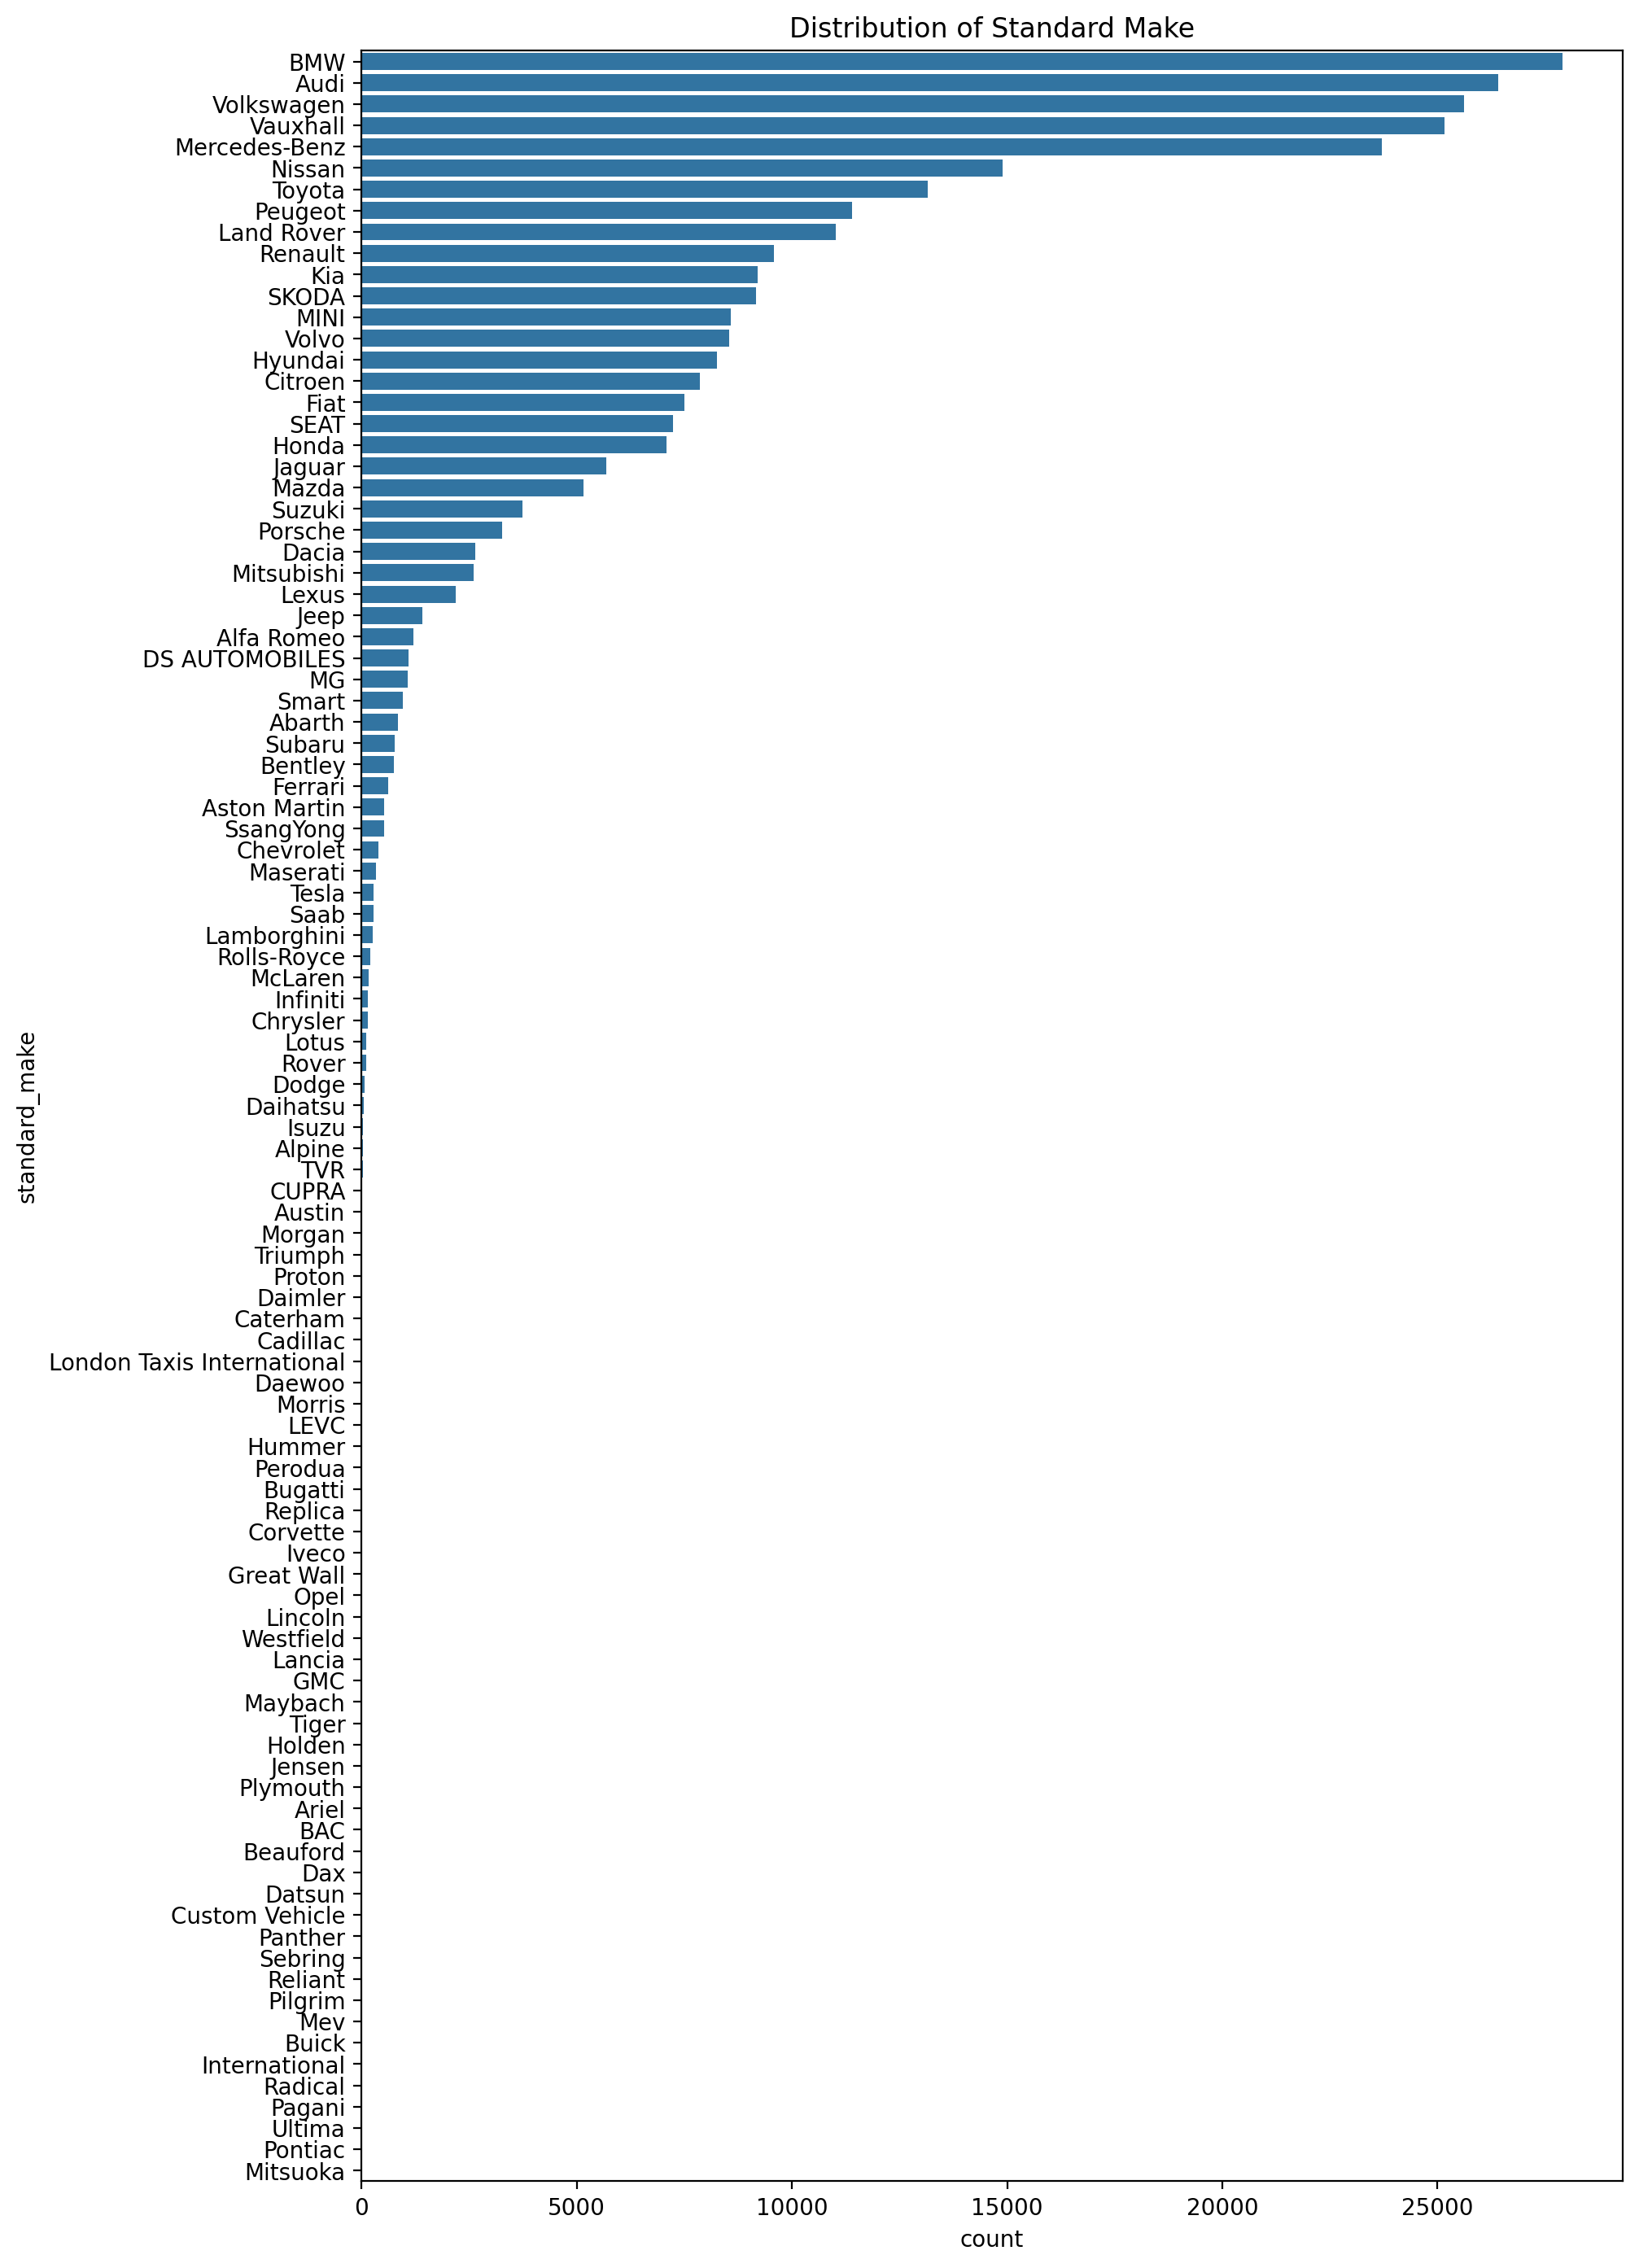

In [60]:
#Distribution of the Standard make shows
#I displayed the top 10 for easier visualization
plt.figure(figsize = (10, 17))
train_sm = train['standard_make'].value_counts().head(100).reset_index()
ax = sns.barplot(data = train_sm, x = 'count', y = 'standard_make')
ax.set_title('Distribution of Standard Make')

In [61]:
train['standard_make'].value_counts(normalize = True).head(50)

standard_make
BMW              0.09
Audi             0.09
Volkswagen       0.09
Vauxhall         0.08
Mercedes-Benz    0.08
Nissan           0.05
Toyota           0.04
Peugeot          0.04
Land Rover       0.04
Renault          0.03
Kia              0.03
SKODA            0.03
MINI             0.03
Volvo            0.03
Hyundai          0.03
Citroen          0.03
Fiat             0.02
SEAT             0.02
Honda            0.02
Jaguar           0.02
Mazda            0.02
Suzuki           0.01
Porsche          0.01
Dacia            0.01
Mitsubishi       0.01
Lexus            0.01
Jeep             0.00
Alfa Romeo       0.00
DS AUTOMOBILES   0.00
MG               0.00
Smart            0.00
Abarth           0.00
Subaru           0.00
Bentley          0.00
Ferrari          0.00
Aston Martin     0.00
SsangYong        0.00
Chevrolet        0.00
Maserati         0.00
Tesla            0.00
Saab             0.00
Lamborghini      0.00
Rolls-Royce      0.00
McLaren          0.00
Infiniti         0.00
Chrysler         0.00
Lotus            0.00
Rover            0.00
Dodge            0.00
Daihatsu         0.00
Name: proportion, dtype: float64

In [62]:
df['standard_model'].value_counts().head(200)

standard_model
Golf                      11535
Corsa                     10631
C Class                    8534
3 Series                   8338
Polo                       7653
Qashqai                    7502
1 Series                   7446
Astra                      7361
Hatch                      6993
A Class                    6541
A3                         6521
500                        5895
Juke                       5320
E Class                    5248
Yaris                      4644
A1                         4341
Sportage                   4224
Clio                       4204
5 Series                   4010
Range Rover Evoque         3675
Leon                       3590
AYGO                       3516
208                        3272
Octavia                    3247
Civic                      3099
Tiguan                     3069
Insignia                   2996
Captur                     2961
Fabia                      2936
Range Rover Sport          2896
Jazz                       2871
A5                         2811
Ibiza                      2794
Passat                     2564
Mokka X                    2519
Tucson                     2449
A4                         2447
XC60                       2444
i10                        2438
Auris                      2384
Q3                         2361
4 Series                   2343
3008                       2310
2008                       2236
CR-V                       2212
C1                         2169
Range Rover                2157
Micra                      2085
Discovery Sport            2027
XF                         1940
C3                         1862
TT                         1820
Picanto                    1820
Countryman                 1779
Duster                     1708
V40                        1695
Kadjar                     1670
XC90                       1663
X1                         1648
108                        1631
Mazda3                     1590
X5                         1586
up!                        1559
Q2                         1556
911                        1541
Outlander                  1507
Megane                     1475
A4 Avant                   1463
Swift                      1460
GLA Class                  1459
Superb                     1436
Ceed                       1421
308                        1417
2 Series                   1416
A6 Saloon                  1409
Q5                         1364
XC40                       1356
X-Trail                    1342
C-HR                       1331
Mazda2                     1324
Mokka                      1321
CLA Class                  1319
Zafira Tourer              1308
Crossland X                1298
i20                        1248
i30                        1237
T-Roc                      1228
RAV4                       1215
B Class                    1205
XE                         1205
Note                       1193
F-PACE                     1185
Vitara                     1168
Mazda6                     1154
X3                         1152
Prius                      1152
GLC Class                  1149
Convertible                1116
Arona                      1078
Ateca                      1067
Scirocco                   1062
CX-5                       1059
ADAM                       1059
Karoq                      1050
GLE Class                  1039
Grand C4 Picasso           1030
Clubman                    1029
500X                       1005
Rio                        1005
Zafira                      984
S3                          983
Sandero Stepway             981
4 Series Gran Coupe         962
Panda                       958
Grandland X                 958
C4 Cactus                   953
Corolla                     950
Leaf                        950
V60                         943
Q7                          934
Meriva                      931
DS3                         893
S Class                     873
Zoe                         866
fortwo           

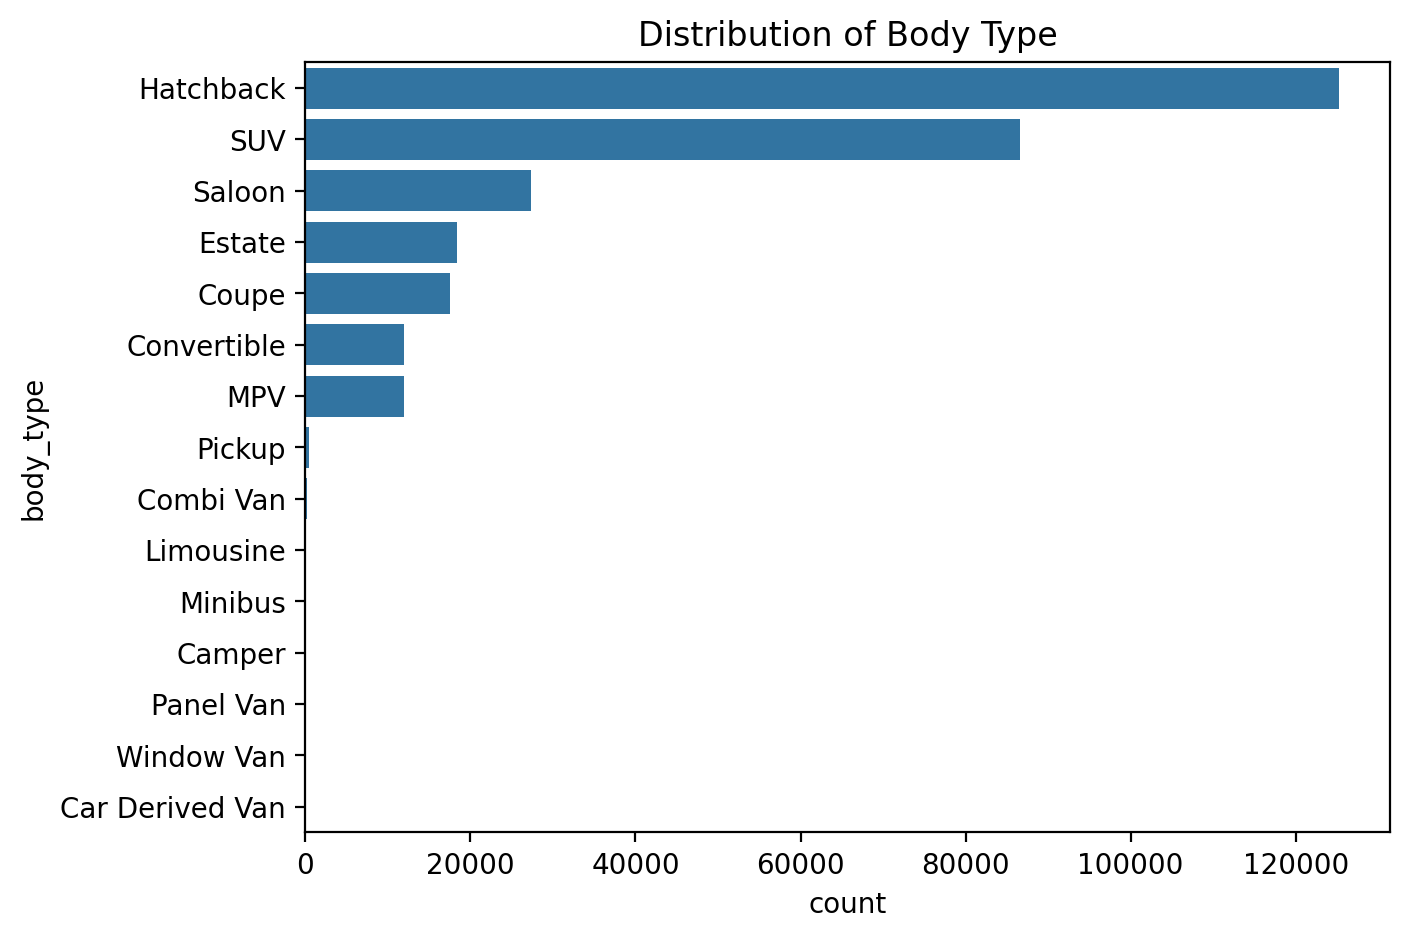

In [63]:
#Hatchbacks and SUVs occurr more in the dataset
plt.figure(figsize = (7,5))
ax = sns.countplot(data = train, y = 'body_type', order =train['body_type'].value_counts().index)
ax.set_title('Distribution of Body Type')
plt.show()

In [64]:
df['body_type'].value_counts(normalize = True)

body_type
Hatchback         0.42
SUV               0.29
Saloon            0.09
Estate            0.06
Coupe             0.06
Convertible       0.04
MPV               0.04
Pickup            0.00
Combi Van         0.00
Limousine         0.00
Minibus           0.00
Camper            0.00
Panel Van         0.00
Window Van        0.00
Chassis Cab       0.00
Car Derived Van   0.00
Name: proportion, dtype: float64

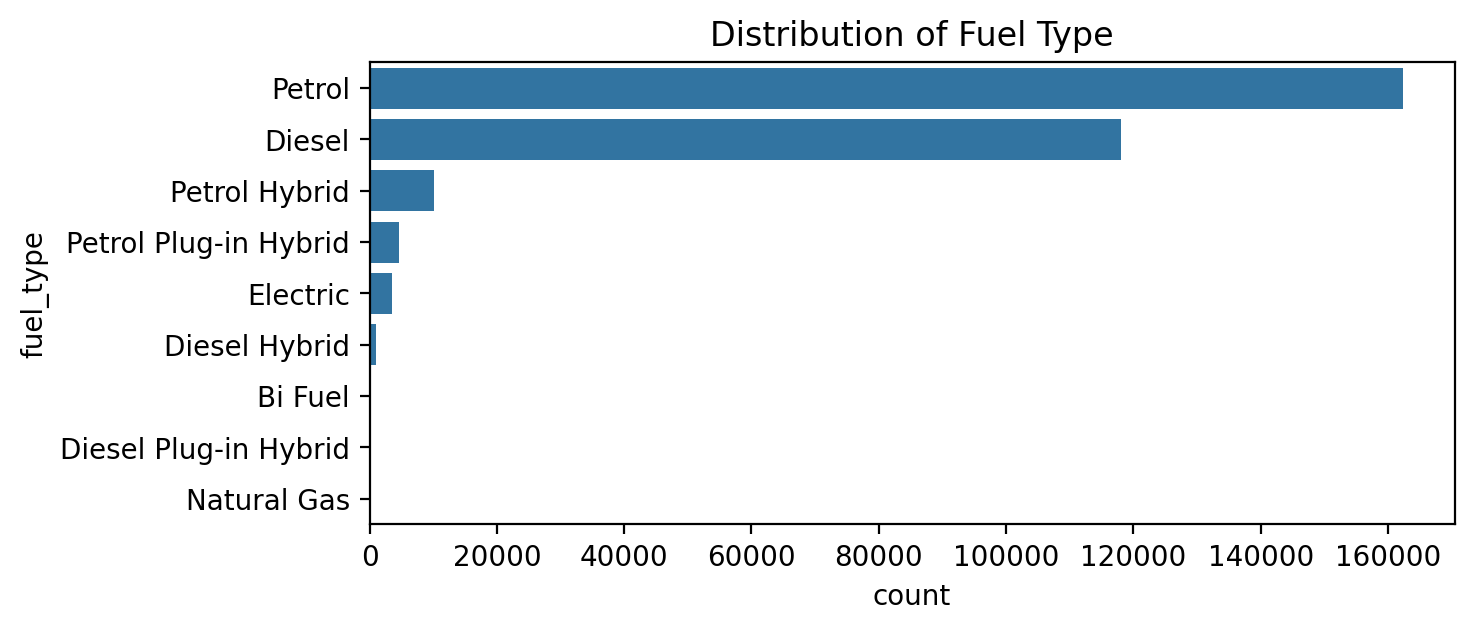

In [65]:
#Petrol and Diesel vehicles are more common
plt.figure(figsize = (7,3))
ax = sns.countplot(data = train, y = 'fuel_type', order = train['fuel_type'].value_counts().index)
ax.set_title('Distribution of Fuel Type')
plt.show()

In [66]:
train['fuel_type'].value_counts(normalize = True)

fuel_type
Petrol                  0.54
Diesel                  0.39
Petrol Hybrid           0.03
Petrol Plug-in Hybrid   0.02
Electric                0.01
Diesel Hybrid           0.00
Bi Fuel                 0.00
Diesel Plug-in Hybrid   0.00
Natural Gas             0.00
Name: proportion, dtype: float64

In [67]:
train['vehicle_condition'].value_counts()

vehicle_condition
0    277082
1     23419
Name: count, dtype: int64

#**EXPLORATORY DATA ANALYSIS**

In [68]:
train.head()

mileage standard_colour  standard_make standard_model  \
205823  5875.00            Grey  Mercedes-Benz        C Class   
373054 96000.00           Beige       Vauxhall         Zafira   
389134 24000.00             Red           MINI          Hatch   
128732 30281.00           Black         Nissan        Qashqai   
267420 48000.00          Silver  Mercedes-Benz            SLK   

        vehicle_condition  year_of_registration    body_type fuel_type   age  \
205823                  0               2019.00       Estate    Diesel  1.00   
373054                  0               2006.00          MPV    Petrol 14.00   
389134                  0               2017.00    Hatchback    Petrol  3.00   
128732                  0               2018.00          SUV    Diesel  2.00   
267420                  0               2012.00  Convertible    Diesel  8.00   

        price  
205823  27980  
373054   1790  
389134   9479  
128732  15250  
267420  10995

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300501 entries, 205823 to 122363
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               300417 non-null  float64
 1   standard_colour       296522 non-null  object 
 2   standard_make         300501 non-null  object 
 3   standard_model        300501 non-null  object 
 4   vehicle_condition     300501 non-null  int64  
 5   year_of_registration  300501 non-null  float64
 6   body_type             299937 non-null  object 
 7   fuel_type             300074 non-null  object 
 8   age                   300501 non-null  float64
 9   price                 300501 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 25.2+ MB


In [70]:
train.isna().sum()

mileage                   84
standard_colour         3979
standard_make              0
standard_model             0
vehicle_condition          0
year_of_registration       0
body_type                564
fuel_type                427
age                        0
price                      0
dtype: int64

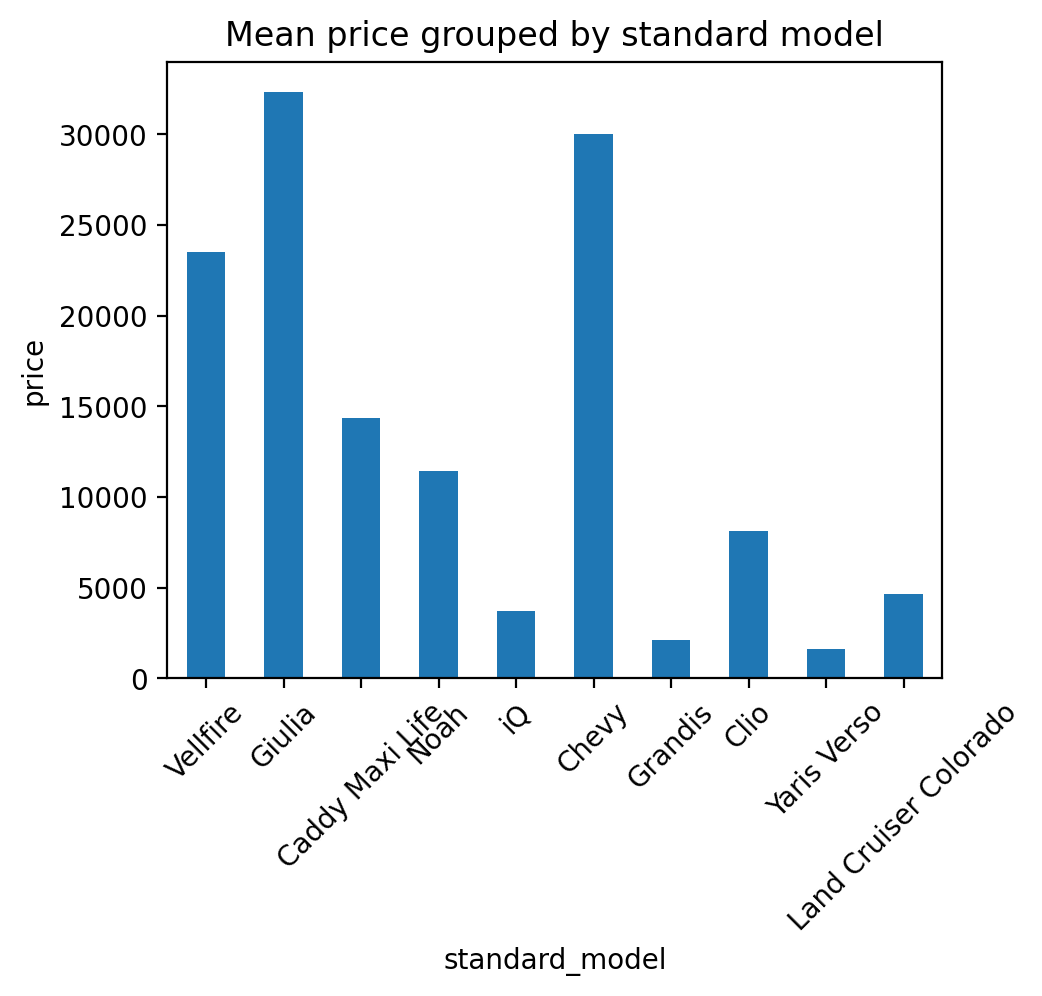

In [88]:
plt.figure(figsize=(5,4))
train.groupby('standard_model')['price'].mean().sample(10).plot(kind="bar")
plt.title('Mean price grouped by standard model')
plt.ylabel('price')
plt.xticks(rotation = 45)
plt.show()

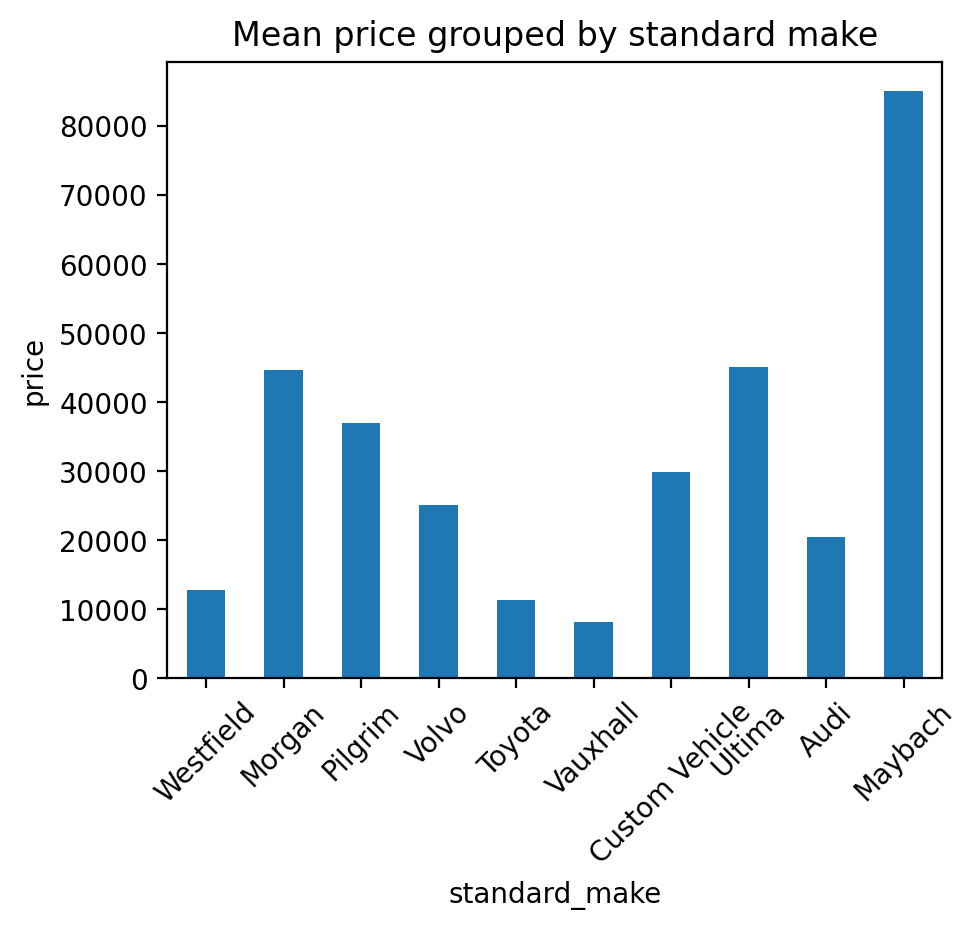

In [89]:
plt.figure(figsize=(5,4))
train.groupby('standard_make')['price'].mean().sample(10).plot(kind="bar")
plt.title('Mean price grouped by standard make')
plt.ylabel('price')
plt.xticks(rotation = 45)
plt.show()

<Figure size 500x1300 with 0 Axes>

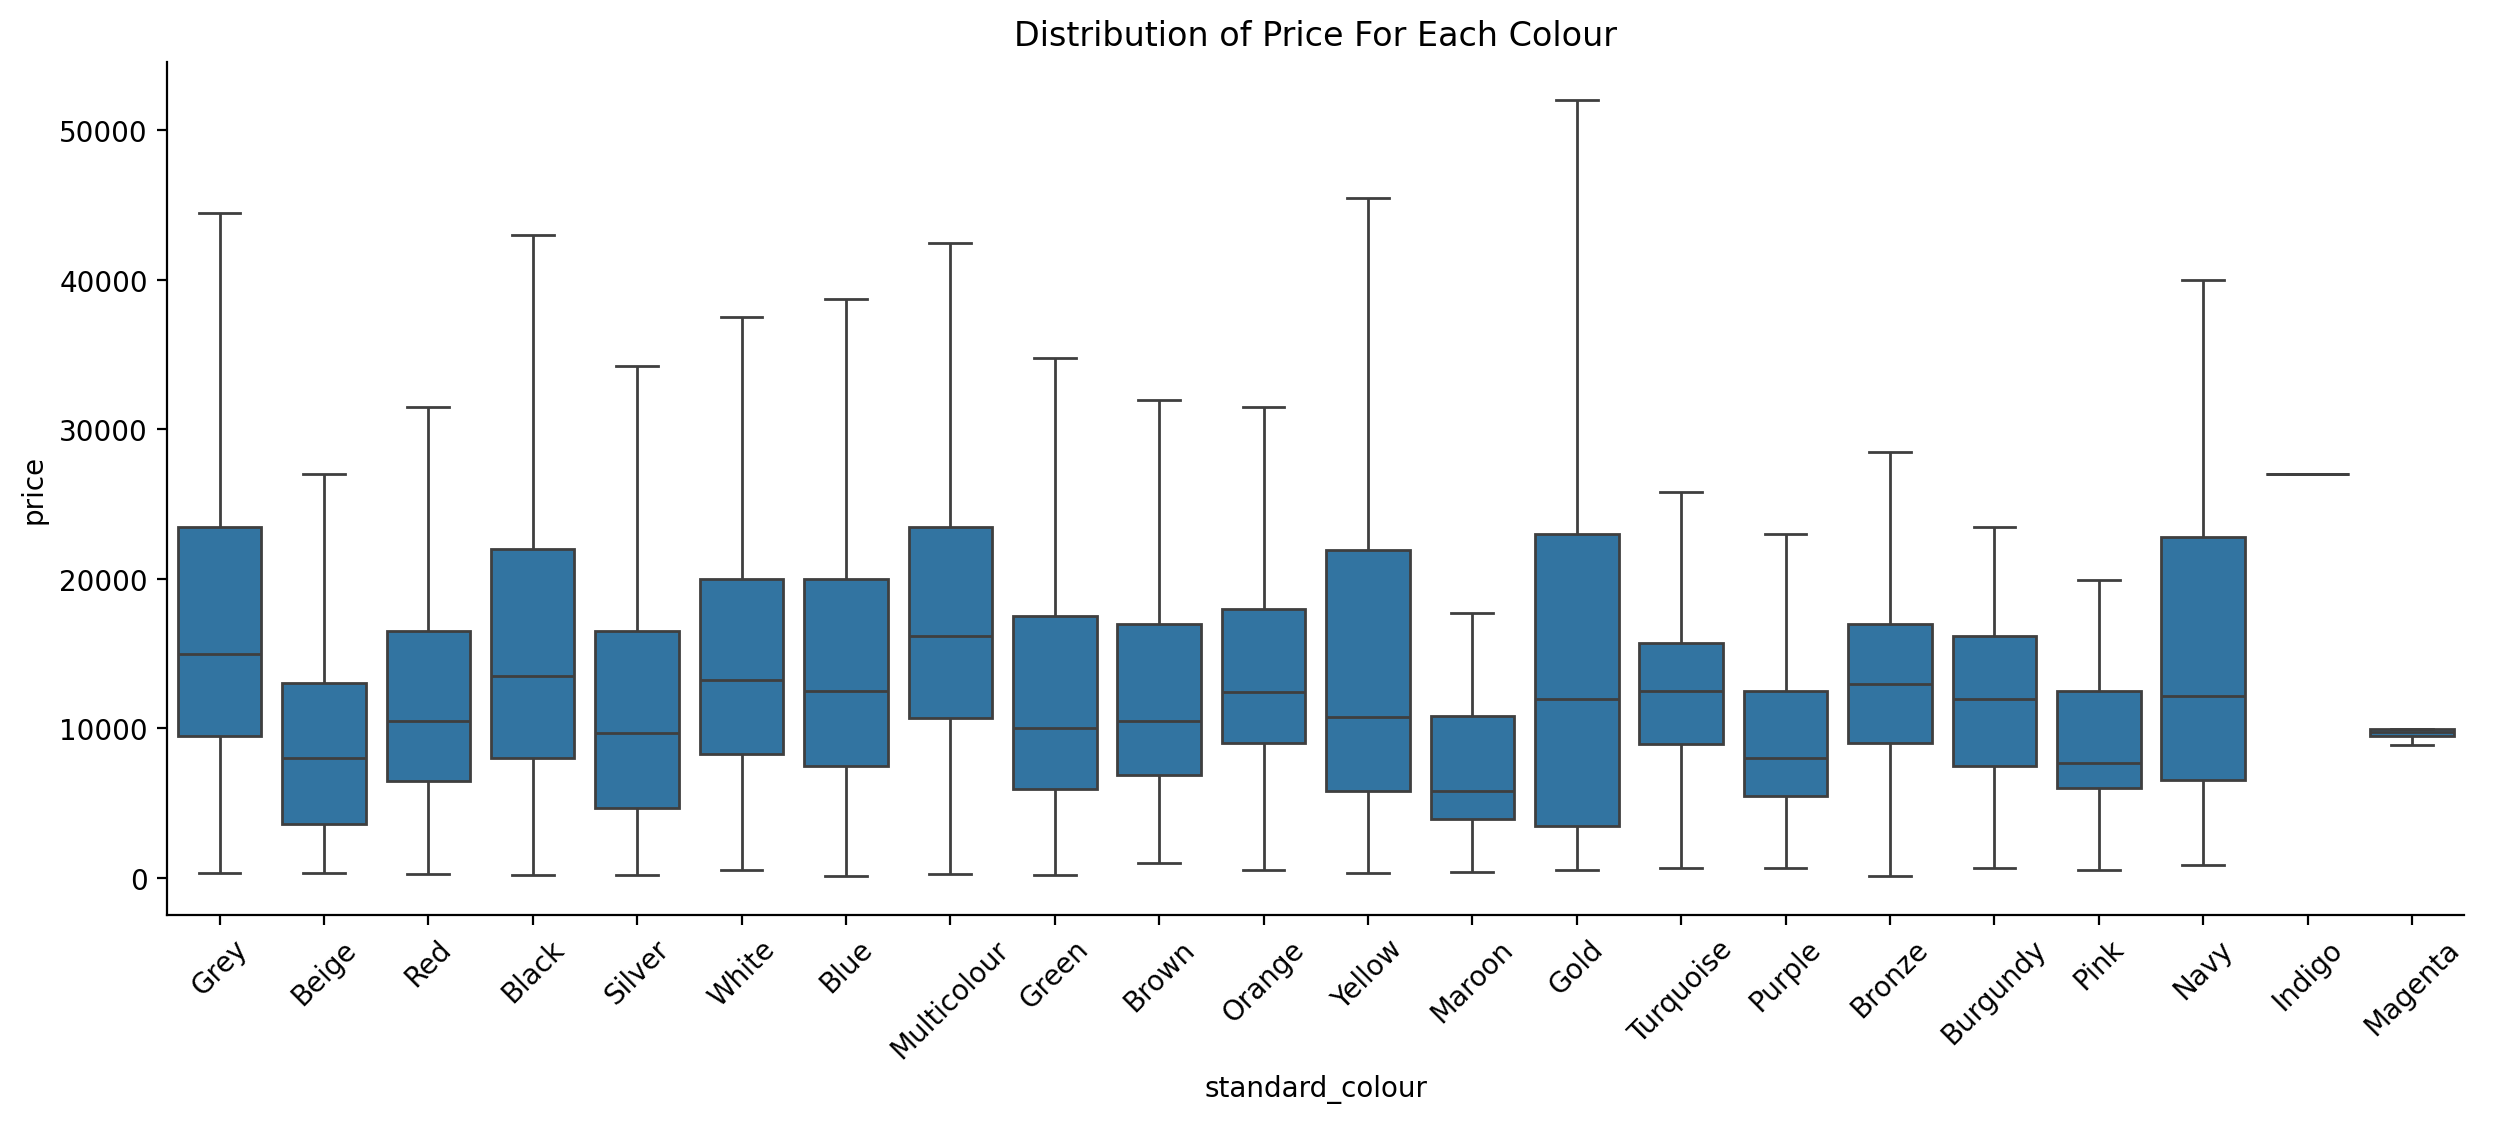

In [73]:
##Price has same relatively same range for each categories of colour
plt.figure(figsize=(5,13))
sns.catplot(data = train, x='standard_colour', y='price', kind='box', showfliers=False, height = 5, aspect = 2.5 )
plt.title('Distribution of Price For Each Colour')
plt.xticks(rotation = 45)
plt.show()

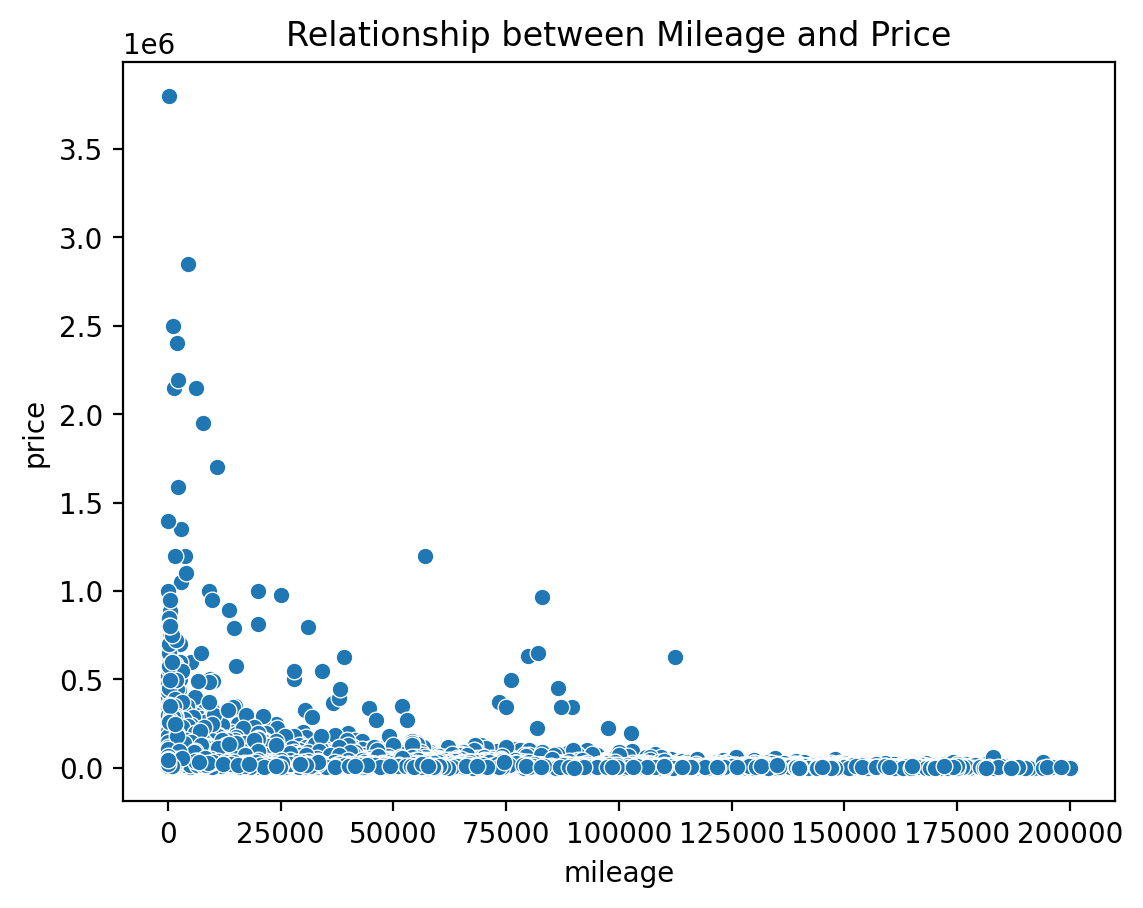

In [74]:
sns.scatterplot(data = train, x ='mileage', y = 'price')
plt.title("Relationship between Mileage and Price")
plt.show()

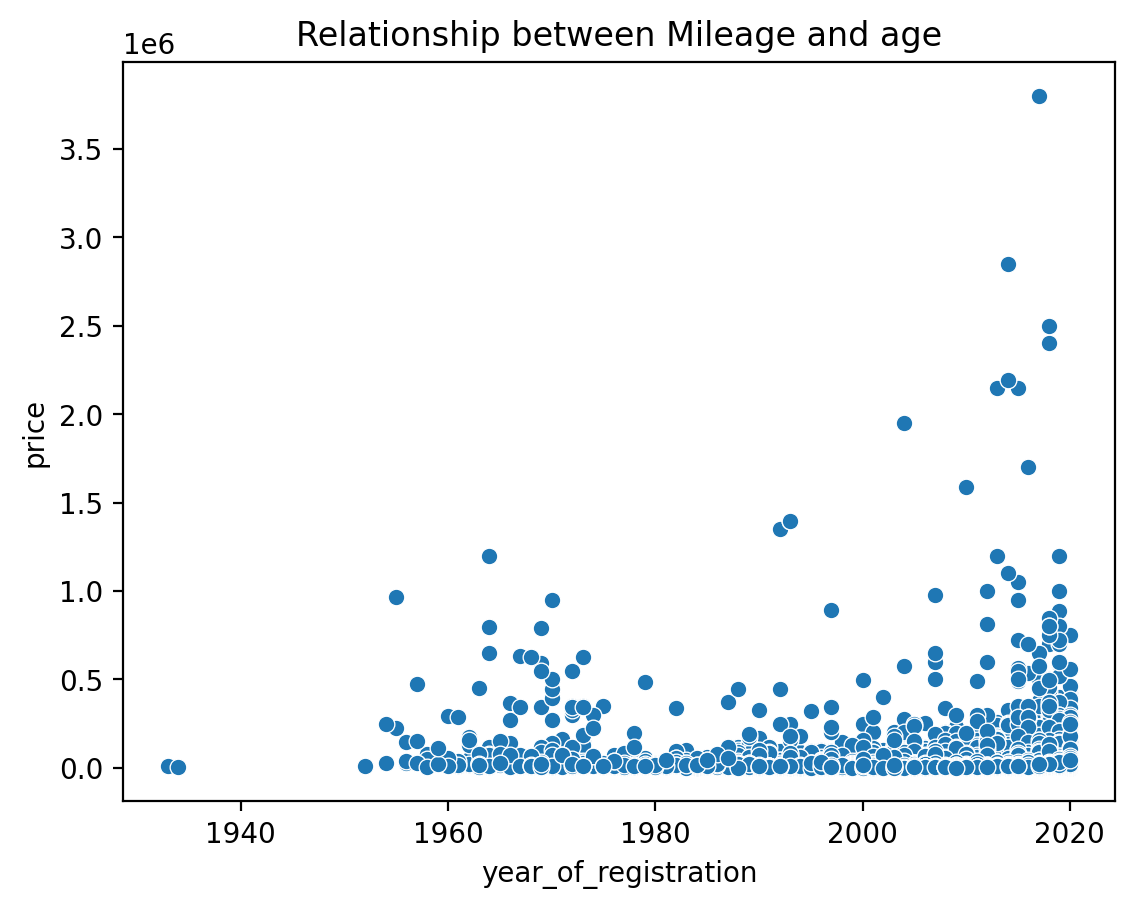

In [92]:
sns.scatterplot(data = train, x ='year_of_registration', y = 'price')
plt.title("Relationship between Mileage and age")
plt.show()

Text(0.5, 1.0, 'Relationship betwwen Year of registration and Mileage')

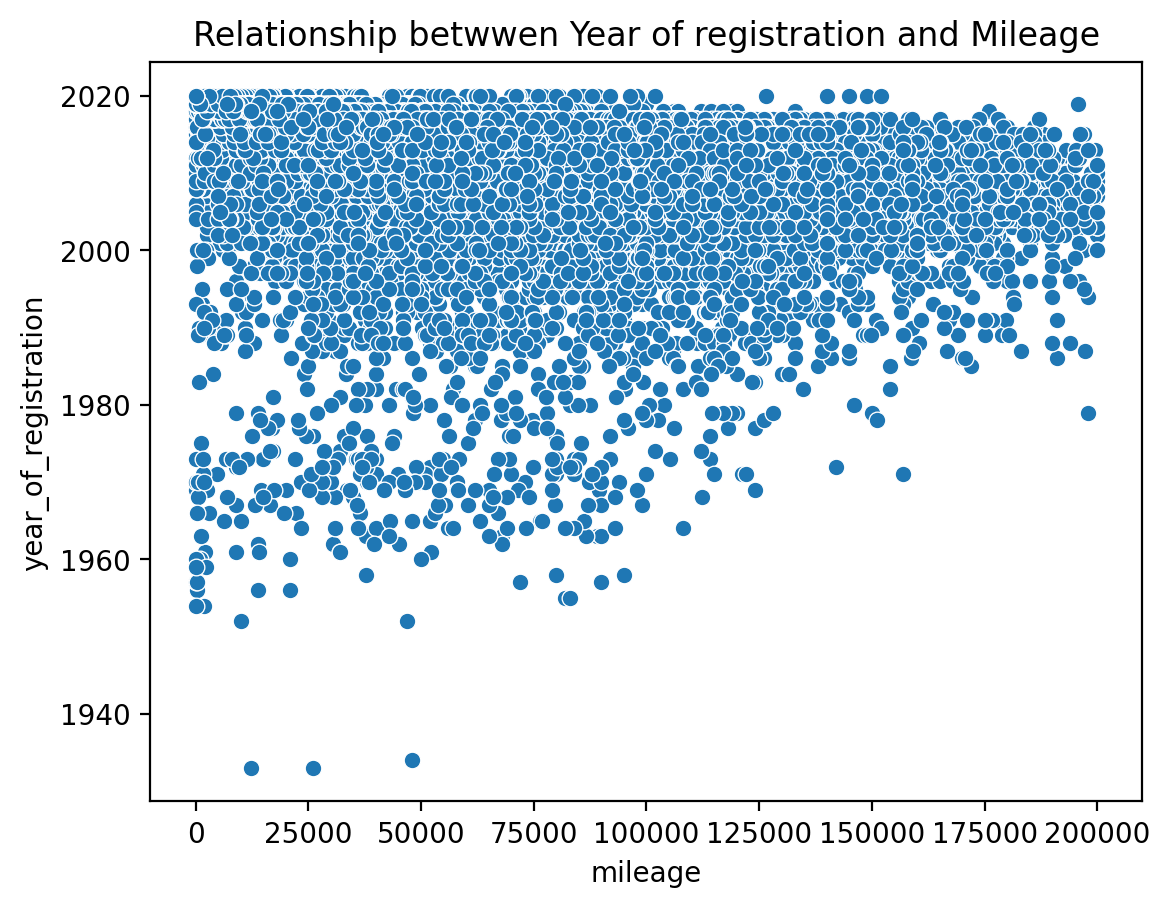

In [76]:
sns.scatterplot(data = train, x ='mileage', y = 'year_of_registration')
plt.title('Relationship betwwen Year of registration and Mileage')

Text(0.5, 1.0, 'Relationship between Age and Mileage')

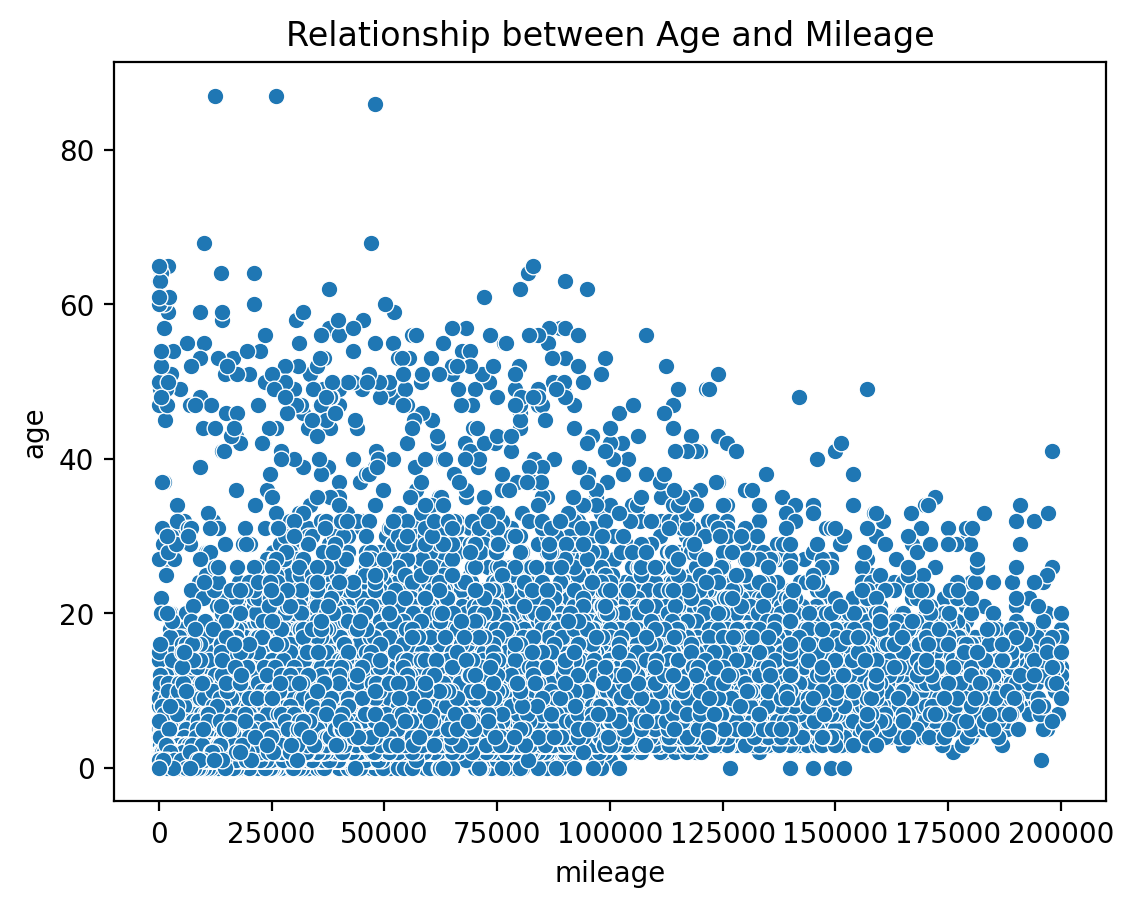

In [77]:
sns.scatterplot(data = train, x ='mileage', y = 'age')
plt.title('Relationship between Age and Mileage')

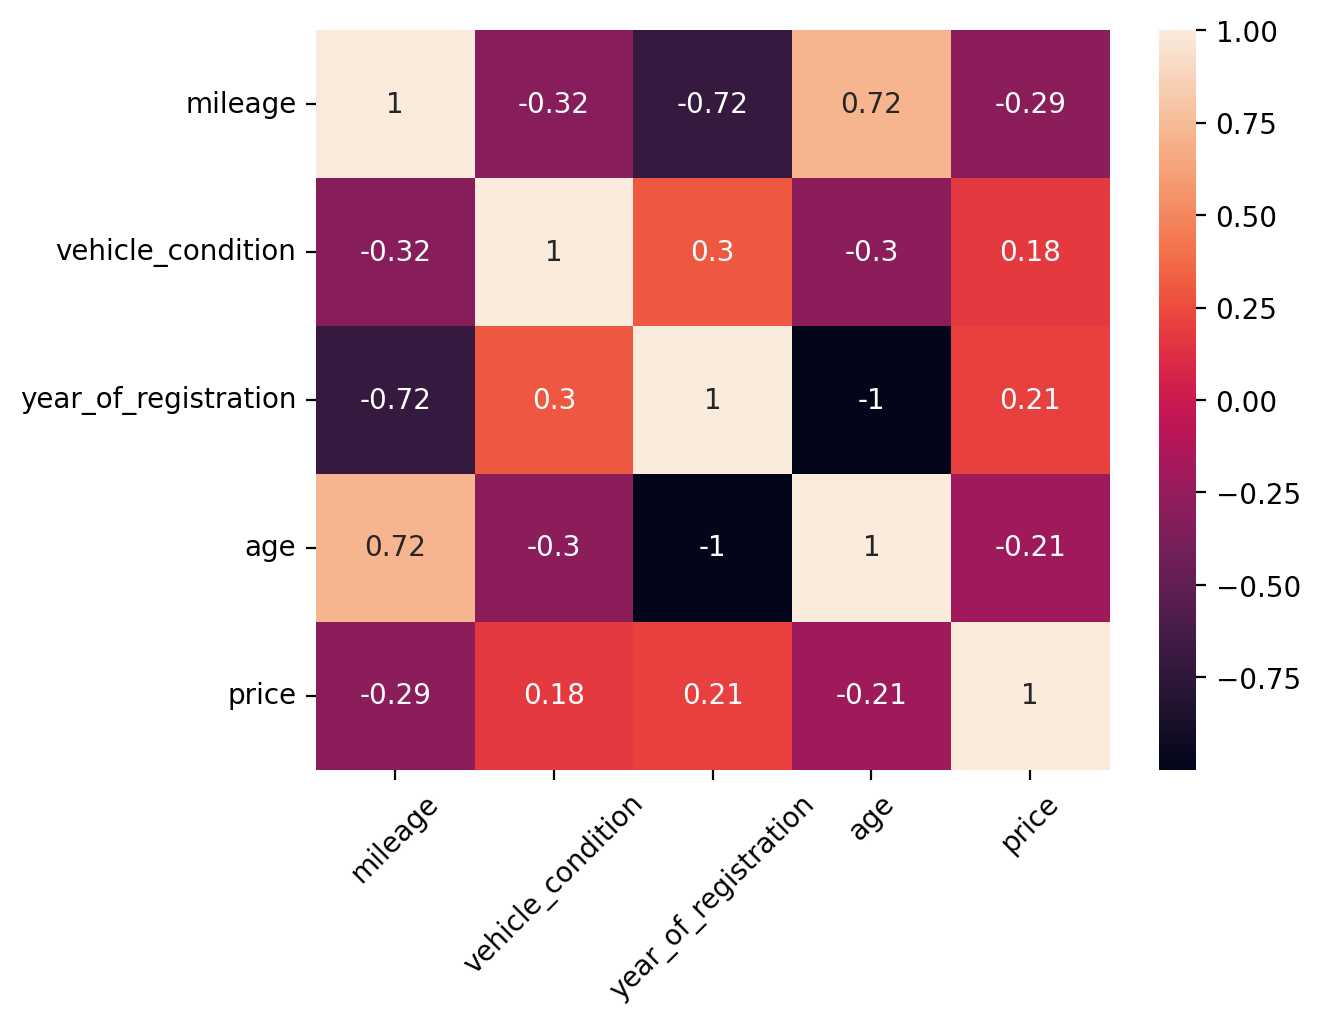

In [78]:
sns.heatmap(data =train[train.select_dtypes('number').columns].corr(), annot = True)
plt.xticks(rotation = 45)
plt.show()

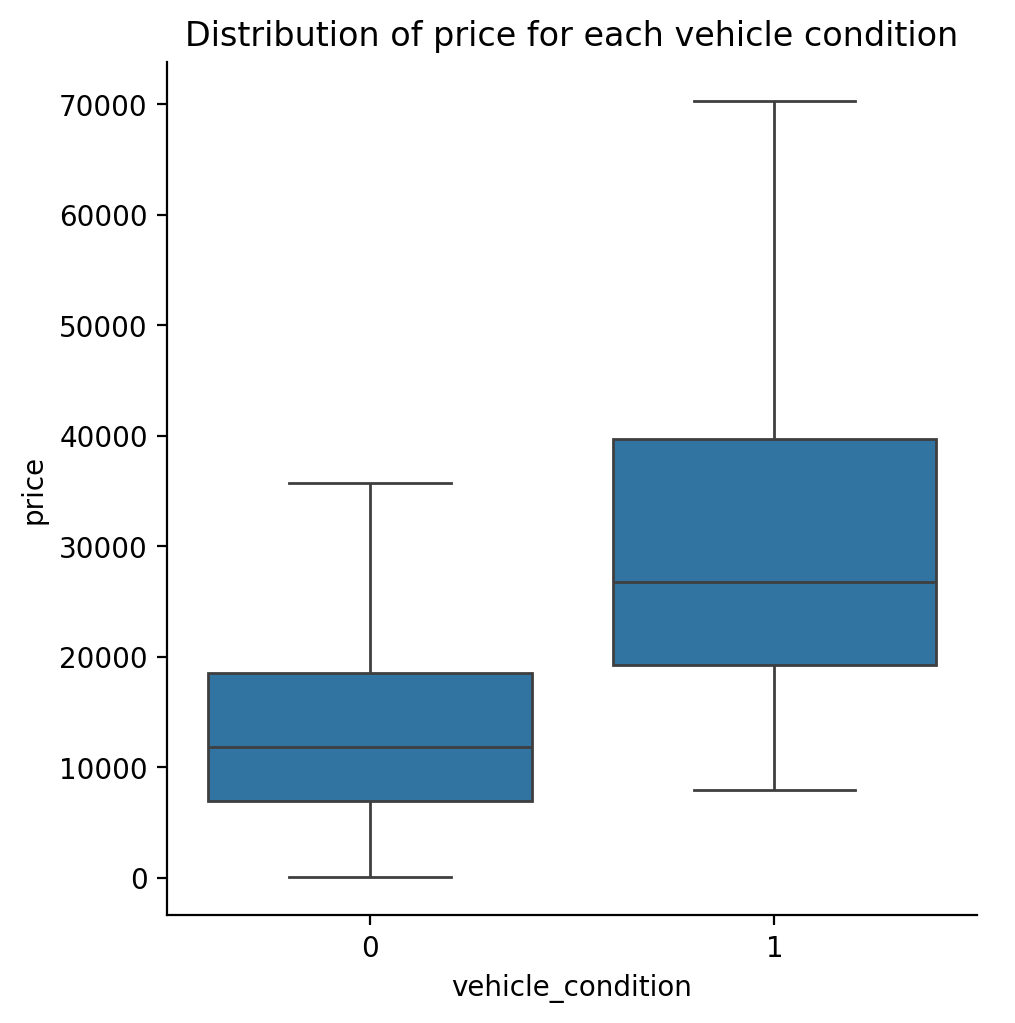

In [79]:
sns.catplot(data = train, x="vehicle_condition",y = "price", kind='box', showfliers=False)
plt.title("Distribution of price for each vehicle condition")
plt.show()

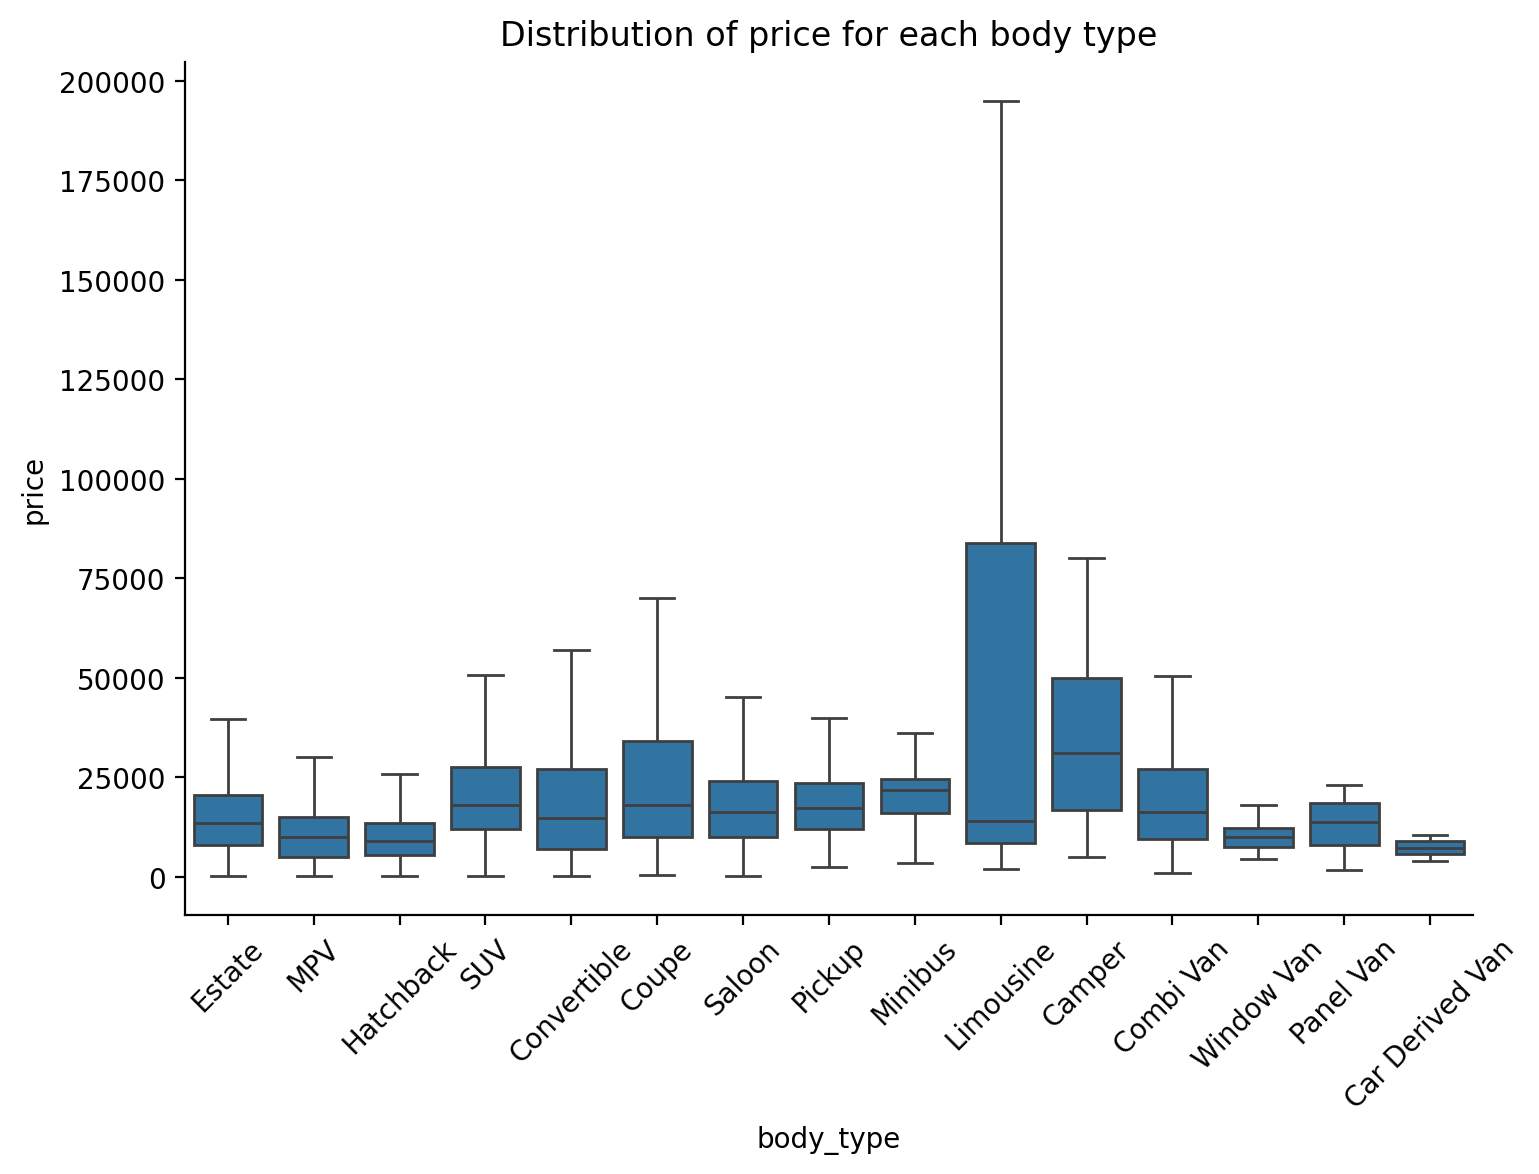

In [80]:
sns.catplot(data=train, x="body_type",y = "price", kind='box', showfliers=False,height = 5, aspect = 1.5)
plt.xticks(rotation = 45)
plt.title("Distribution of price for each body type")
plt.tight_layout
plt.show()

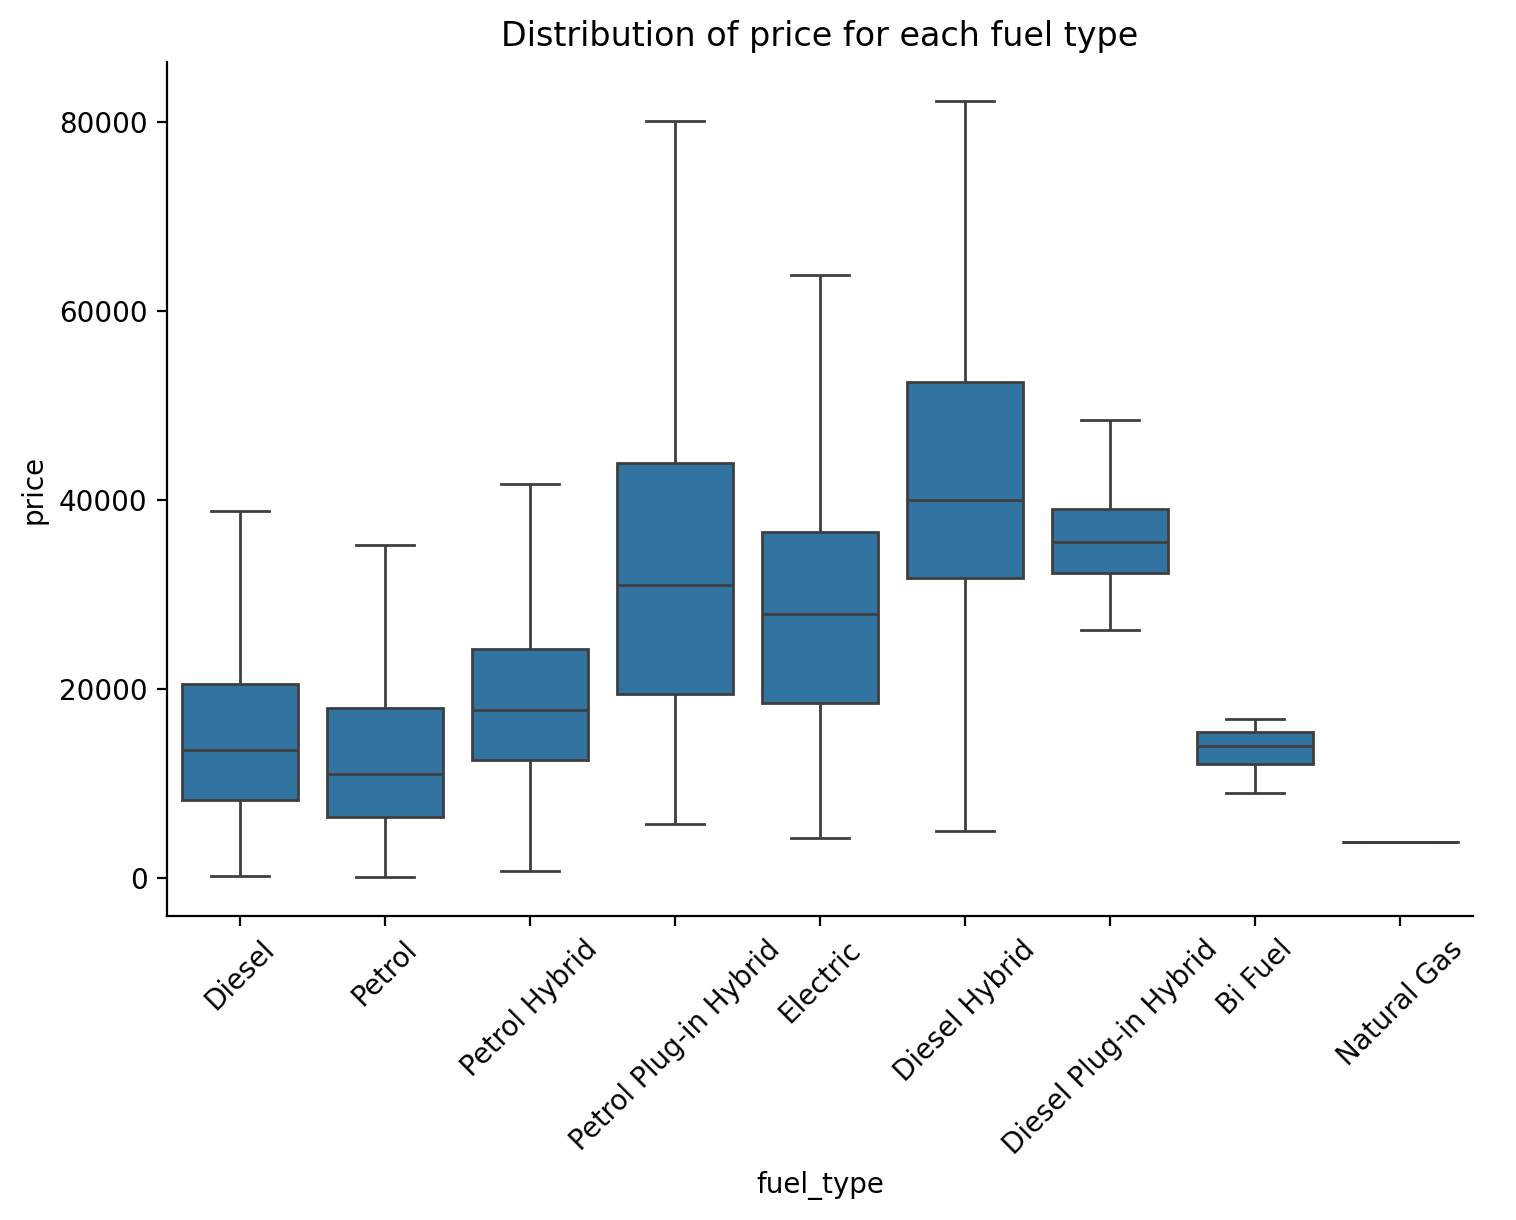

In [81]:
sns.catplot(data=train, x="fuel_type",y = "price", kind='box', showfliers=False,height = 5, aspect = 1.5)
plt.xticks(rotation = 45)
plt.title("Distribution of price for each fuel type")
plt.show()

# MACHINE LEARNING

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder
from sklearn.feature_selection import SequentialFeatureSelector

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin

In [97]:
from sklearn.metrics import PredictionErrorDisplay

In [98]:
!pip install -q shap
import shap
shap.initjs()

In [99]:
#Log transforming price to reduce effect of outliers.
y_train = np.log(y_train)

In [119]:
y_test = np.log(y_test)

In [100]:
#Dropping age to avoid introducing multicollinearlity
X_train.drop("age", axis = 1, inplace = True)
X_test.drop("age", axis = 1, inplace = True)

In [101]:
cat_feat = X_train.select_dtypes(include = "object").columns
num_feat = X_train.select_dtypes(include = "number").columns

In [102]:
cat_feat

Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object')

In [103]:
num_feat

Index(['mileage', 'vehicle_condition', 'year_of_registration'], dtype='object')

# ENCODING CATEGORICAL VARIABLES


## GROUPER CLASS

In [104]:
## Transformer to group low frequency categories in a column
class Grouper(BaseEstimator, TransformerMixin):
    def __init__(self,columns, threshold = 0.01):
        self.columns = columns
        self.threshold = threshold
        self.colmap = {}

    def fit(self,X, y = None):
      for col in self.columns:
        if col == 'standard_model':
          freq = X[col].value_counts()
          self.colmap[col] = list(freq[freq < 100].index)
        else:
          freq = X[col].value_counts(normalize = True)
          self.colmap[col] = list(freq[freq <= self.threshold].index)
      return self

    def transform(self,X,y = None):
      X_encoded = X.copy()
      for col in self.columns:
        X_encoded[col] = X_encoded[col].apply(lambda x: "Others" if pd.isnull(x) or x in self.colmap[col] else x)
      return X_encoded

In [80]:
cat_feat

Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object')

In [81]:
grp = Grouper(cat_feat)

In [82]:
grp.fit(X_train,y_train)

Grouper(columns=Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object'))

In [83]:
df1 = grp.transform(X_train)

In [100]:
df2 = grp.transform(X_test)

In [101]:
df2.head()

mileage standard_colour standard_make      standard_model  \
367756 30702.00           Green        Nissan             X-Trail   
3472   20141.00            Grey       Citroen                  C3   
349848 90000.00            Grey          Fiat                 500   
173784 50000.00            Grey    Land Rover  Range Rover Evoque   
60625  24023.00          Orange       Renault              Captur   

        vehicle_condition  year_of_registration  body_type fuel_type  
367756                  0               2017.00        SUV    Diesel  
3472                    0               2017.00  Hatchback    Petrol  
349848                  0               2013.00  Hatchback    Petrol  
173784                  0               2017.00        SUV    Diesel  
60625                   0               2017.00        SUV    Diesel

In [ ]:
#class FreqEncoder(BaseEstimator, TransformerMixin):
#  def __init__(self,columns):
#    self.freqmap = {}
#    self.columns = columns

#  def fit(self,X,y=None):
#    for col in self.columns:
#      self.freqmap[col] = X[col].value_counts().to_dict()
#    return self

#  def transform(self,X,y=None):
#    X_enc = X.copy()
#    for col in self.columns:
#      X_enc[col] = X_enc[col].map(self.freqmap[col])
#    return X_enc

# PREPROCESSING PIPELINE FUNCTION

In [105]:
def create_pp_ppln(X,scaling = False):
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy = 'mean')),
        ]
    )
    if scaling:
        numeric_transformer.steps.extend([
            ("scaler", StandardScaler()),
        ])
    categorical_transformer = Pipeline(
        steps=[
            ("grp", Grouper(cat_feat)),
            ("imputer", SimpleImputer(strategy = "most_frequent")),
            ("enc", TargetEncoder())
        ]
    )
    if scaling:
        categorical_transformer.steps.extend([
            ("scaler", StandardScaler())
        ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, num_feat),
            ("cat", categorical_transformer, cat_feat),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    return preprocessor

In [106]:
def create_regr_ppln(est, X,scaling = False):
    """ """
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X,scaling)),
            ("sfs", SequentialFeatureSelector(LinearRegression(),n_features_to_select = "auto",direction = "backward")),
            ("regr", est)
        ]
    )

    return regr_pipe

# **SEQUENTIAL FEATURE SELECTION**

Due to lack of computational power, I was not be able to carry out sequential feature selection using another estimator, like the randomforest regressor or gradient boosting regressor rather i used good old linear regression

In [125]:
sfs_b = SequentialFeatureSelector(
  LinearRegression(), n_features_to_select="auto", direction="backward"
).fit(lr.named_steps['pp'].fit_transform(X_train,y_train),y_train)

In [126]:
sfs_features = sfs_b.get_feature_names_out()

In [127]:
sfs_features

array(['mileage', 'year_of_registration', 'standard_make',
       'standard_model'], dtype=object)

# **LINEAR REGRESSION**

In [114]:
lr = create_regr_ppln(LinearRegression(),X_train, scaling = True)

In [115]:
lr.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['mileage', 'vehicle_condition', 'year_of_registration'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('grp',
                                                                   Grouper(columns=Index(['standard_colour', 'standard_make', 'standard_model', 'body_typ...
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   TargetEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression())),
                ('regr', LinearRegression())])

In [120]:
def results(est):
  y_pred = est.predict(X_test)
  train_score,test_score,mae =est.score(X_train,y_train), est.score(X_test,y_test), mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  return (train_score,test_score,mae)

In [121]:
lrs = results(lr)

In [122]:
lrs

(0.7774569739479222, 0.776028453304447, 4837.086202731163)

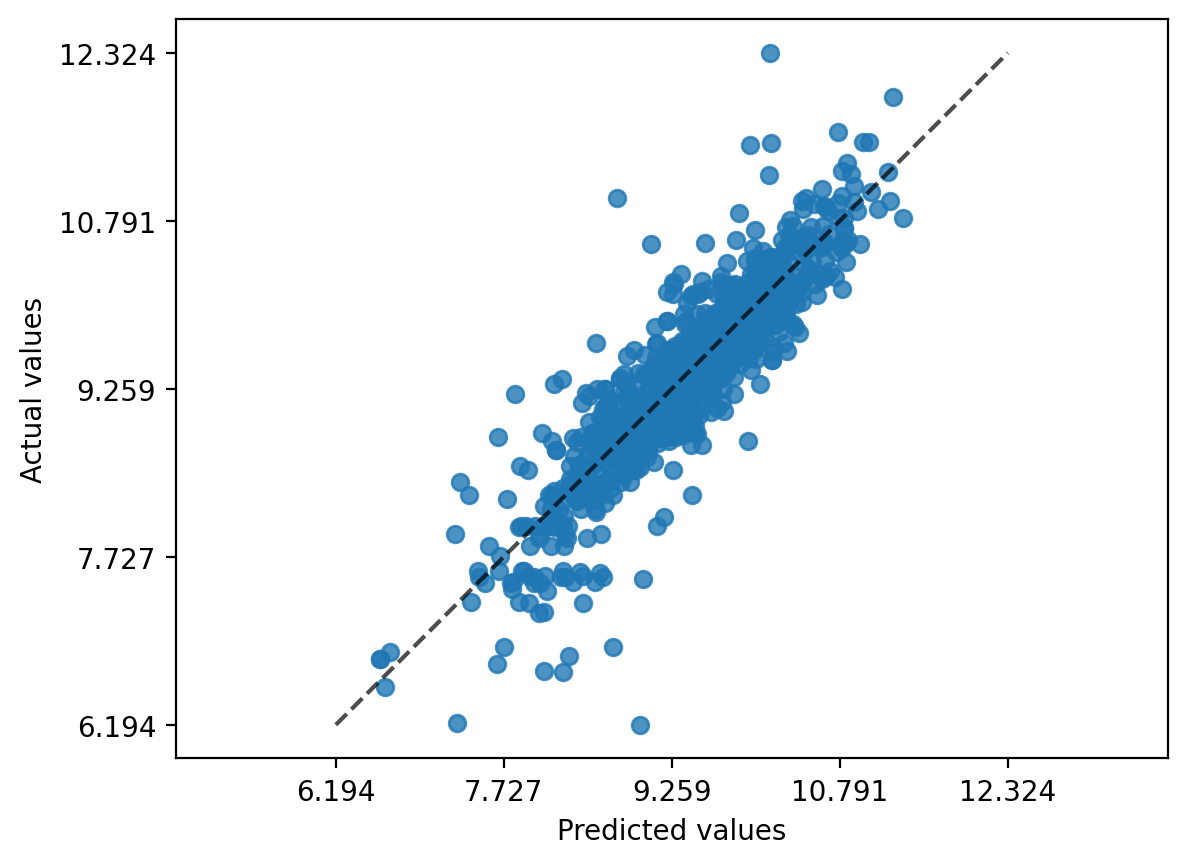

In [123]:
PredictionErrorDisplay.from_estimator(
    lr, X_test, y_test, kind="actual_vs_predicted"
);

#**RANDOM FOREST**

In [ ]:
rf = create_regr_ppln(RandomForestRegressor(),X_train,scaling = False)

Due to computational reasons, grid search and cross validation can not be carried out, but if computational power was available, the hyperparameters would have been tuned and cross validated to get the best parameters for the model

In [ ]:
param_grid = {
    'regr__max_depth': [3,5,7,9,13,15,17,19],
    'regr__min_samples_leaf': [3,5,7,9,13,15,17,19],
    'regr__min_samples_split': [3,5,7,9,13,15,17,19],
    'regr__n_estimators': [200,250,300]
}

In [112]:
gs = GridSearchCV(rf, param_grid,n_jobs=1, return_train_score=True)

In [113]:
gs.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(gs.cv_results_)

In [ ]:
gs.best_estimator_

In [124]:
rf = create_regr_ppln(RandomForestRegressor(max_depth=13, min_samples_leaf=5, min_samples_split=10,n_estimators=250),X_train,scaling = False)

In [125]:
rf

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['mileage', 'vehicle_condition', 'year_of_registration'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('grp',
                                                                   Grouper(columns=Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='objec...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   TargetEncoder())]),
                                                  Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression())),
                ('regr',
                 RandomForestRegressor(max_depth=13, min_samples_leaf=5,
                                       min_samples_split=10,
                                       n_estimators=250))])

In [126]:
rf.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['mileage', 'vehicle_condition', 'year_of_registration'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('grp',
                                                                   Grouper(columns=Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='objec...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   TargetEncoder())]),
                                                  Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression())),
                ('regr',
                 RandomForestRegressor(max_depth=13, min_samples_leaf=5,
                                       min_samples_split=10,
                                       n_estimators=250))])

In [127]:
rfs = results(rf)

In [128]:
print(rfs)

(0.9190677224134265, 0.9070166182990013, 2933.3896732135104)


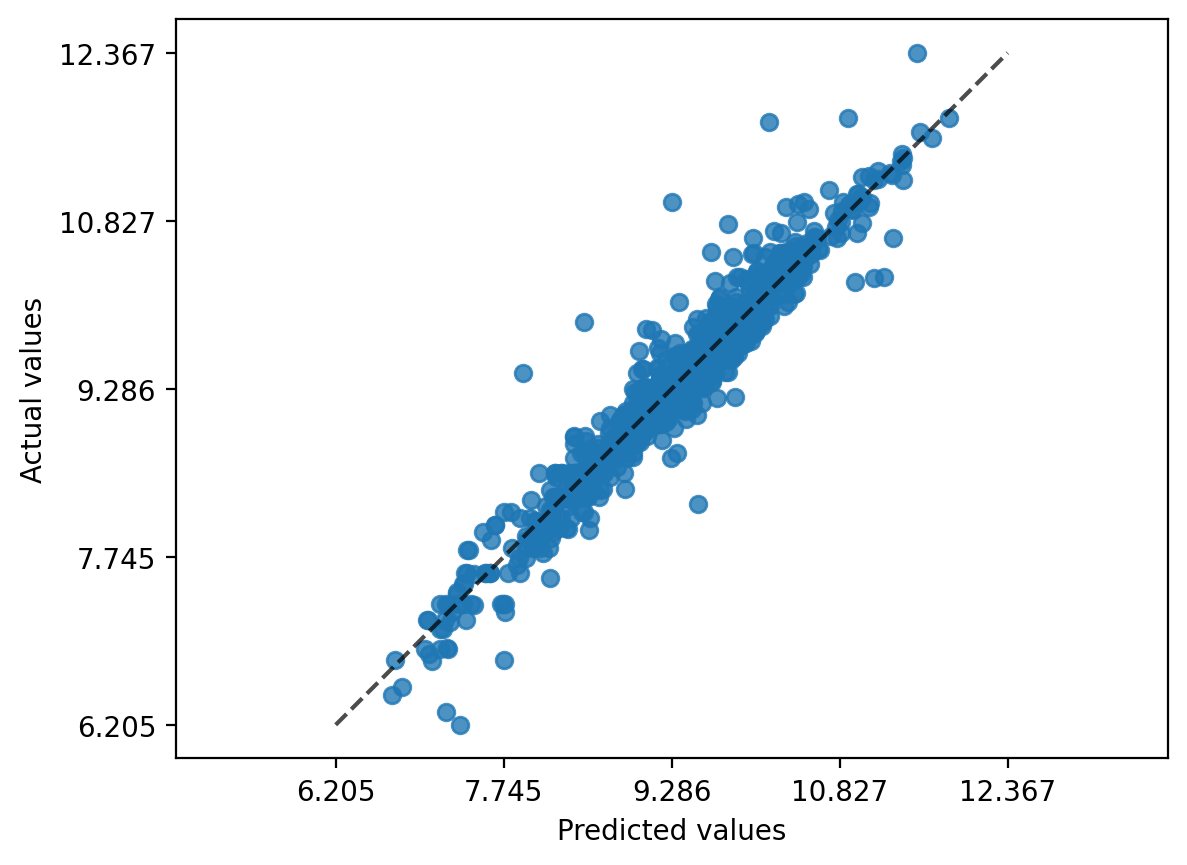

In [129]:
PredictionErrorDisplay.from_estimator(
    rf, X_test, y_test, kind="actual_vs_predicted",
);

#**BOOSTED TREES**

In [130]:
gbr = create_regr_ppln(GradientBoostingRegressor(n_estimators=250, learning_rate=0.15, max_depth=7),X_train,scaling = False)

In [131]:
gbr.fit(X_train,y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['mileage', 'vehicle_condition', 'year_of_registration'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('grp',
                                                                   Grouper(columns=Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='objec...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   TargetEncoder())]),
                                                  Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('sfs',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LinearRegression())),
                ('regr',
                 GradientBoostingRegressor(learning_rate=0.15, max_depth=7,
                                           n_estimators=250))])

In [132]:
gbrs = results(gbr)

In [133]:
gbrs

(0.9328626021706664, 0.9188536641737127, 2756.5063326008176)

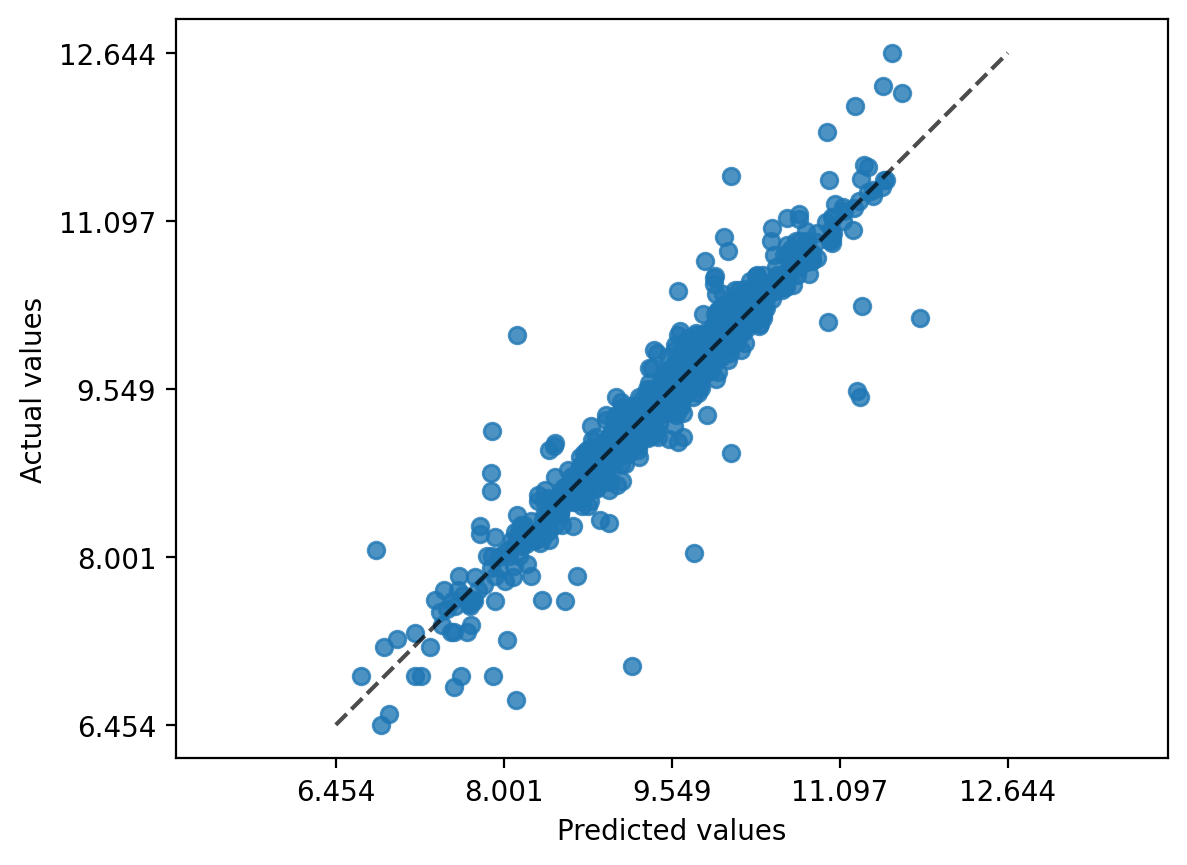

In [134]:
PredictionErrorDisplay.from_estimator(
    gbr, X_test, y_test, kind="actual_vs_predicted",
);

# ENSEMBLE MODEL

In [135]:
from sklearn.ensemble import VotingRegressor

In [136]:
ensemble = VotingRegressor(estimators = [("rf",rf),("gbr",gbr)])

In [137]:
ensemble.fit(X_train,y_train)

VotingRegressor(estimators=[('rf',
                             Pipeline(steps=[('pp',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               Index(['mileage', 'vehicle_condition', 'year_of_registration'], dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('grp',
                                                                                                Grouper(columns=Index(['standard_colour', 'standard_make', 'standard_model', 'bo...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('enc',
                                                                                                TargetEncoder())]),
                                                                               Index(['standard_colour', 'standard_make', 'standard_model', 'body_type',
       'fuel_type'],
      dtype='object'))],
                                                                verbose_feature_names_out=False)),
                                             ('sfs',
                                              SequentialFeatureSelector(direction='backward',
                                                                        estimator=LinearRegression())),
                                             ('regr',
                                              GradientBoostingRegressor(learning_rate=0.15,
                                                                        max_depth=7,
                                                                        n_estimators=250))]))])

In [138]:
ensr = results(ensemble)

In [139]:
ensr

(0.9293697457680808, 0.9164959291073977, 2794.762102643829)

#MODEL RESULTS

In [140]:
model_results = pd.DataFrame([lrs,rfs,gbrs,ensr],columns=["train_score","test_score","MAE"], index = ['Linear Regression','RandomForest','Gradient Boosting','Ensemble'])

In [141]:
model_results

train_score  test_score     MAE
Linear Regression         0.78        0.78 4837.09
RandomForest              0.92        0.91 2933.39
Gradient Boosting         0.93        0.92 2756.51
Ensemble                  0.93        0.92 2794.76

In [142]:
models = [rf,gbr,ensemble]

In [143]:
model_results = []

In [144]:
## Loop over each model and get their train,test and mae scores, this would be more concise if there was
## computational power
for model in models:
  train_score,test_score = model.score(X_train,y_train),model.score(X_test,y_test)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  model_results.append(
      (train_score,test_score,mae)
  )

# INTEPRETING MODEL WITH SHAP




In [145]:
gb_model = gbr.named_steps['regr']

In [146]:
def globalshap(est,model):
  explainer = shap.TreeExplainer(model,est.named_steps['sfs'].transform(est.named_steps['pp'].transform(X_train)))

  shap_values = explainer(est.named_steps['sfs'].transform(rf.named_steps['pp'].transform(X_test)).sample(frac=0.02))

  return shap_values

In [147]:
shap_values = globalshap(gbr,gb_model)

 99%|===================| 1980/2003 [00:35<00:00]       

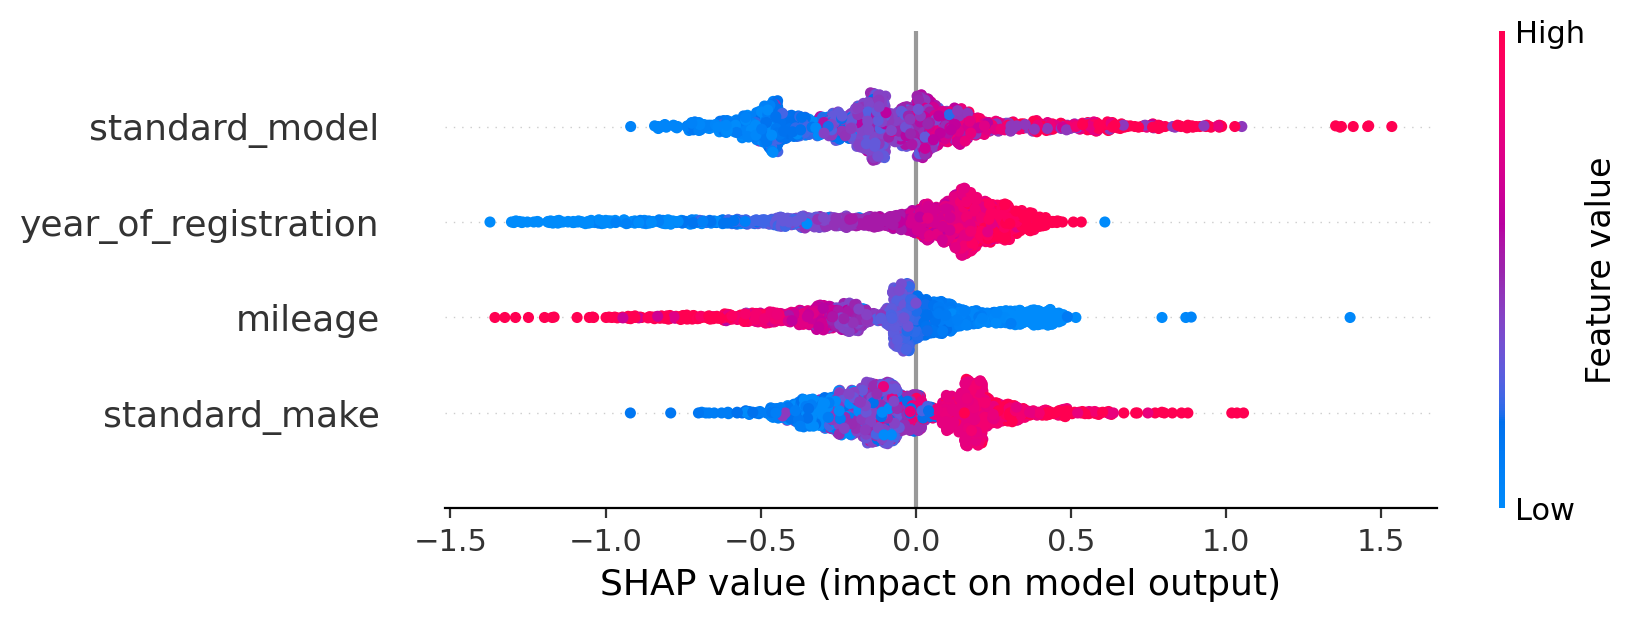

In [148]:
#global model
shap.plots.beeswarm(shap_values)

EXPORTING MODEL